# **This is a Object detection model for Chess pieces using deep learning. The deep learning model used here is YOLOv8**

## **1. Mount the drive and import libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.4/605.4 kB 31.1 MB/s eta 0:00:00


Load the libraries

In [ ]:
#required for avoid printing the warnings
import warnings
warnings.filterwarnings("ignore")

#required for accessing the paths
import os

#required for working with images
import PIL
from PIL import Image

#required for running the YOLO model
from ultralytics import YOLO

## **2. Data preparation:**

Save the data in YOLO format. The data needs to be divided in the following folders:
- Train
- Val
- Test

Each of the above folder should contain "images" and "labels" folder. The filenames should be the same for images and its respective annotation file(labels), except for the extensions/formats. Labels should always be saved in .txt format

The bounding box of the labels should be in Xcenter, Ycenter, Width and Height format. Also, remember to normalize the numbers i.e. the numbers should between 0 and 1

We also need yaml file to be working with YOLO model. The path to Train, Val and Test folders should be defined in the yaml file. It also contains number of classes and the names of classes/labels to train the model

Once the data is saved in this format, it is really easy to train the model. Let's move on to training the model

## **3. YOLO Model:**

Path for images and labels for train, test and validation set. This is not required to set, as it takes all the paths from yaml files (just setting it for the users convenience and make it easy to find)

In [ ]:
train_dest = '/content/drive/MyDrive/School/YOLO/Chess Pieces/train/images'
val_dest = '/content/drive/MyDrive/School/YOLO/Chess Pieces/valid/images'
test_dest = '/content/drive/MyDrive/School/YOLO/Chess Pieces/test/images'

Assign required epoch, batch size and image resolution

In [ ]:
#epoch
ep = 50

#batch size
bs = 8

#image resolution
ir = 512

Load the YOLO(yolov8m.pt) pretrained model(.pt stands for pretrained and m stands for medium)

YOLOv8 model is for object detection, YOLOv8-cls for image classification and YOLOv8-seg for image image segmentation

In [ ]:
#Load the pretrained model
model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 325MB/s]


Train the model by providing yaml file path, epochs, image size and batch size. IoU is 0.7 by default for YOLOv8

In [ ]:
#!yolo task=detect mode=train model=yolov8m.pt data=custom.yaml epochs=ep imgsz=ir

In [ ]:
model.train(data='/content/drive/MyDrive/School/YOLO/Chess Pieces/data.yaml', epochs=ep, imgsz=ir, batch=bs)

Ultralytics YOLOv8.0.136 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/School/YOLO/Chess Pieces/data.yaml, epochs=50, patience=50, batch=8, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=

After the model is trained, all the results are being saved to `runs/detect/train`

## **4. Detecting the objects:**

This section shows the localized objects and detects it per image

This is a command-line-like representation of running a YOLO model in prediction mode for object detection on a specific image.

* **task** = detect specifies that the task is object detection(can also be classify/segment)
* **mode** = val indicates that the model is being used in validation mode. (can also be train/predict)
* **model** = specifies the path to the pre-trained model weights file.(can be YOLOv8n, YOLOv8s, YOLOv8m, YOLOv8l, YOLOv8x or saved weights)
* **conf=0.50** sets the confidence threshold for object detection to 0.50. This means that only objects with a confidence score greater than or equal to 0.50 will be detected.
* **data** = specifies the path to the yaml file and it will go through the validation set on which object detection will be performed.

In [44]:
model = '/content/runs/detect/train/weights/best.pt'
test_imgs = '/content/drive/MyDrive/School/YOLO/Chess Pieces/test/images'

### Validate custom model:

In [76]:
#using command line interface
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt conf=0.50 data={HOME}'/drive/MyDrive/School/YOLO/Chess Pieces/data.yaml'

/content
Ultralytics YOLOv8.0.136 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25847287 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/School/YOLO/Chess Pieces/valid/labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100% 58/58 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:05<00:00,  1.40s/it]
                   all         58        386      0.984       0.99      0.987      0.823
          black-bishop         58         22          1      0.955      0.977      0.744
            black-king         58         29          1      0.966      0.982      0.874
          black-knight         58         30          1          1      0.995      0.839
            black-pawn         58         77          1          1      0.995      0.812
           black-queen         58         11      0.917          1      0.995      0.826
            black-rook      

### Inference with custom model:

In [77]:
#inference using command line interface
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.50 source={HOME}'/drive/MyDrive/School/YOLO/Chess Pieces/test/images' save=True

/content
Ultralytics YOLOv8.0.136 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25847287 parameters, 0 gradients

image 1/29 /content/drive/MyDrive/School/YOLO/Chess Pieces/test/images/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.jpg: 512x512 1 white-bishop, 25.6ms
image 2/29 /content/drive/MyDrive/School/YOLO/Chess Pieces/test/images/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg: 512x512 1 white-rook, 25.5ms
image 3/29 /content/drive/MyDrive/School/YOLO/Chess Pieces/test/images/2f6fb003bb89cd401322a535acb42f65_jpg.rf.66c0a46773a9cd583fb96c3df41a9e0c.jpg: 512x512 2 black-bishops, 1 black-king, 2 black-knights, 8 black-pawns, 1 black-queen, 2 black-rooks, 2 white-bishops, 1 white-king, 2 white-knights, 8 white-pawns, 1 white-queen, 2 white-rooks, 25.5ms
image 4/29 /content/drive/MyDrive/School/YOLO/Chess Pieces/test/images/410993714e325a1de3e394ffe860df3a_jpg.rf.657c49ca295ef54

In [ ]:
'''
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#loading model
chess_model = YOLO(model=model, task='detect')

#give the path of images that needs to be predicted
predictions = chess_model.predict(test_imgs)

#predict and plot the defects for all the images from predictions list above
for prediction in predictions:
    img = prediction.plot()
    plt.imshow(img)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [14]:
predictions[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: 'bishop', 1: 'black-bishop', 2: 'black-king', 3: 'black-knight', 4: 'black-pawn', 5: 'black-queen', 6: 'black-rook', 7: 'white-bishop', 8: 'white-king', 9: 'white-knight', 10: 'white-pawn', 11: 'white-queen', 12: 'white-rook'}
orig_img: array([[[  5,   7,   7],
        [104, 106, 106],
        [196, 198, 198],
        ...,
        [213, 215, 215],
        [214, 216, 216],
        [216, 218, 218]],

       [[106, 108, 108],
        [168, 170, 170],
        [220, 222, 222],
        ...,
        [214, 216, 216],
        [216, 218, 218],
        [218, 220, 220]],

       [[195, 197, 197],
        [216, 218, 218],
        [229, 231, 231],
        ...,
        [214, 216, 216],
        [217, 219, 219],
        [220, 222, 222]],

       ...,

       [[209, 213, 214],
        [208, 212, 213],
        [210, 214, 215],
        ...,
     

In [25]:
result_0 = predictions[0]
result_2 = predictions[2]

In [26]:
len(result_0.boxes),len(result_2.boxes)

(1, 32)

In [28]:
print("Object type:", result_0.boxes.cls)
print("Coordinates:", result_0.boxes.xyxy)
print("Probability:", result_0.boxes.conf)

Object type: tensor([7.], device='cuda:0')
Coordinates: tensor([[203.5023,   7.2548, 223.1422,  62.6239]], device='cuda:0')
Probability: tensor([0.8941], device='cuda:0')


In [27]:
print("Object type:", result_2.boxes.cls)
print("Coordinates:", result_2.boxes.xyxy)
print("Probability:", result_2.boxes.conf)

Object type: tensor([ 8.,  3., 10., 11., 10.,  2., 10.,  4.,  1.,  3., 10.,  4., 10.,  4.,  9.,  1., 12.,  4.,  4., 10.,  4.,  9.,  7.,  4.,  7.,  4., 10.,  6., 10., 12.,  5.,  6.], device='cuda:0')
Coordinates: tensor([[ 51.3662, 128.7402,  82.6943, 209.5830],
        [239.7333, 112.7585, 264.4154, 170.9011],
        [169.1086, 210.0947, 189.2461, 255.2299],
        [ 98.9034,  56.7595, 128.4348, 127.4345],
        [103.6863,  47.8463, 123.3970,  89.6884],
        [302.9910,  83.5016, 336.6240, 165.3973],
        [163.0771,  80.0783, 183.2643, 124.7052],
        [274.3660, 121.2692, 294.3833, 165.5064],
        [136.2717, 193.6546, 161.7072, 255.1835],
        [255.2016, 248.0585, 283.3500, 303.9105],
        [161.5864,  14.6017, 181.3073,  57.9126],
        [201.4426,  16.6304, 220.1847,  59.0827],
        [ 90.8550, 254.1629, 114.1588, 301.3141],
        [203.8798,  87.7411, 223.5309, 131.9120],
        [133.3088, 109.2514, 158.6479, 164.3323],
        [259.8168,   5.8410, 282.1185,

In [29]:
result_0.boxes.xyxy

tensor([[203.5023,   7.2548, 223.1422,  62.6239]], device='cuda:0')

In [30]:
result_0.boxes.conf

tensor([0.8941], device='cuda:0')

In [31]:
result_0.boxes.cls

tensor([7.], device='cuda:0')

In [38]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [41]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [42]:
!ls {HOME}/runs/detect/train/

args.yaml					   train_batch1.jpg
confusion_matrix_normalized.png			   train_batch2.jpg
confusion_matrix.png				   train_batch3080.jpg
events.out.tfevents.1689553906.508f597d944c.310.0  train_batch3081.jpg
F1_curve.png					   train_batch3082.jpg
labels_correlogram.jpg				   val_batch0_labels.jpg
labels.jpg					   val_batch0_pred.jpg
P_curve.png					   val_batch1_labels.jpg
PR_curve.png					   val_batch1_pred.jpg
R_curve.png					   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


In [50]:
from IPython.display import display, Image

#### Output graphs for training dataset:

/content


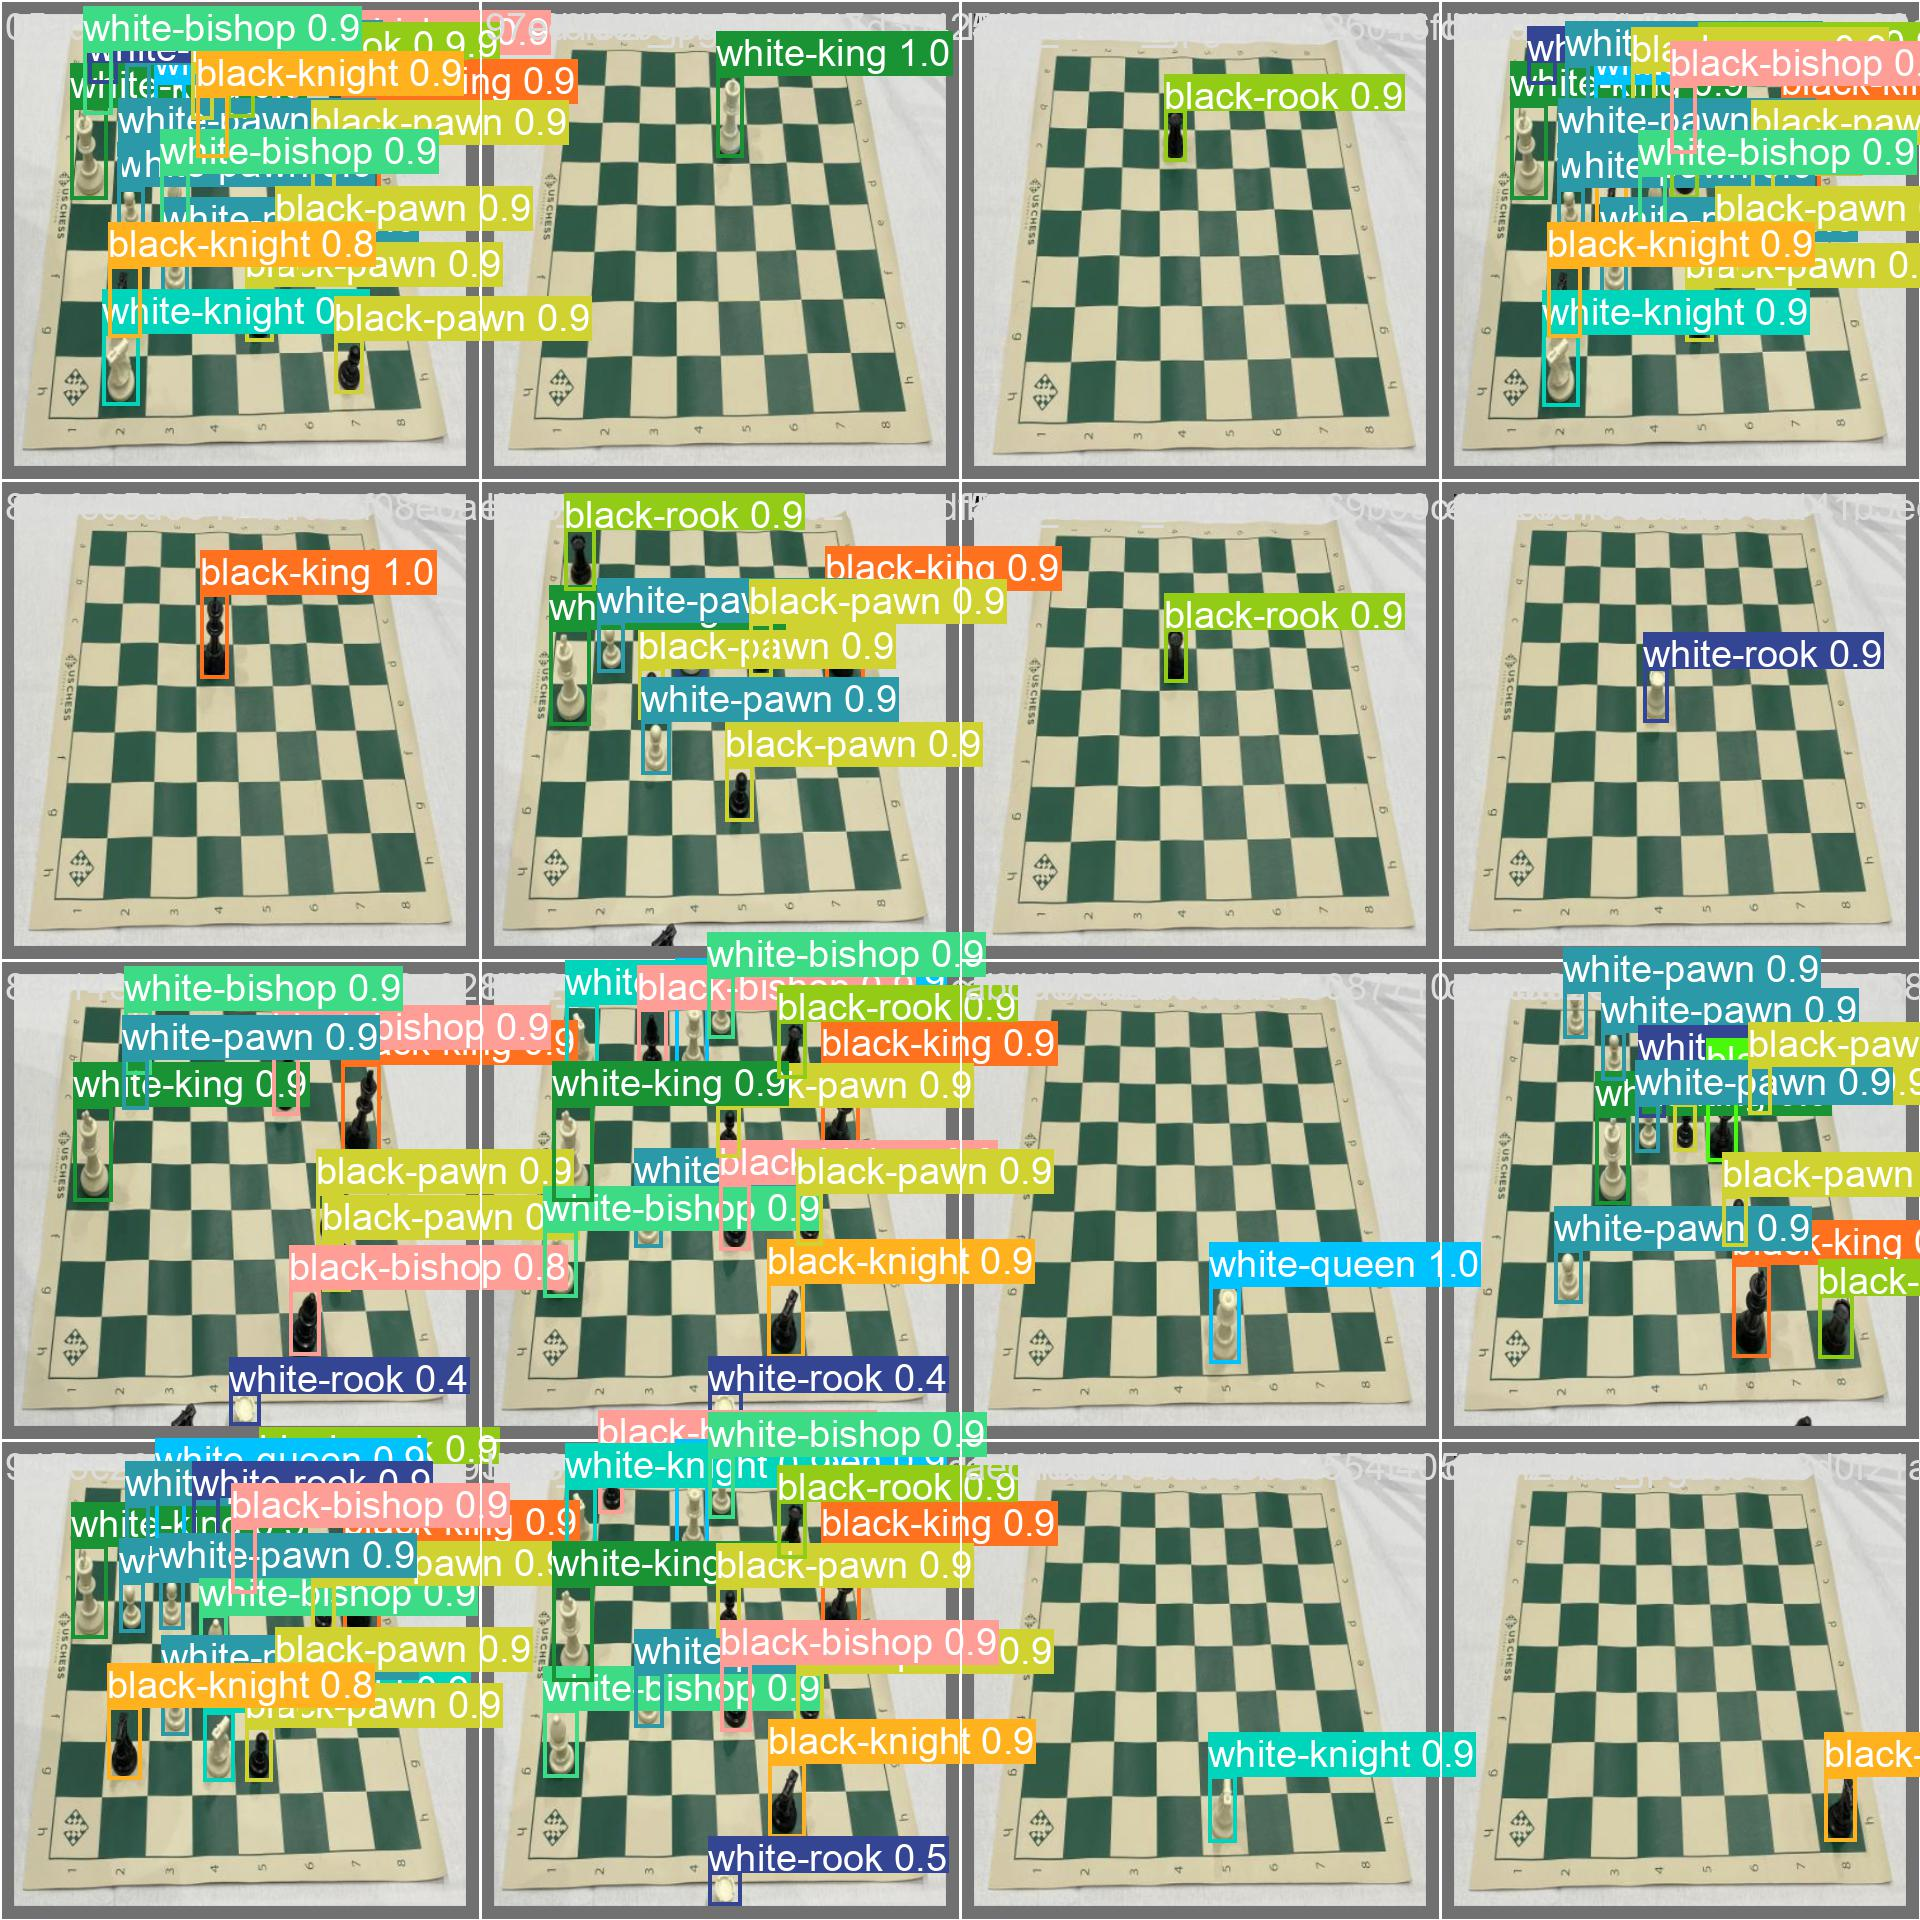

In [78]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

/content


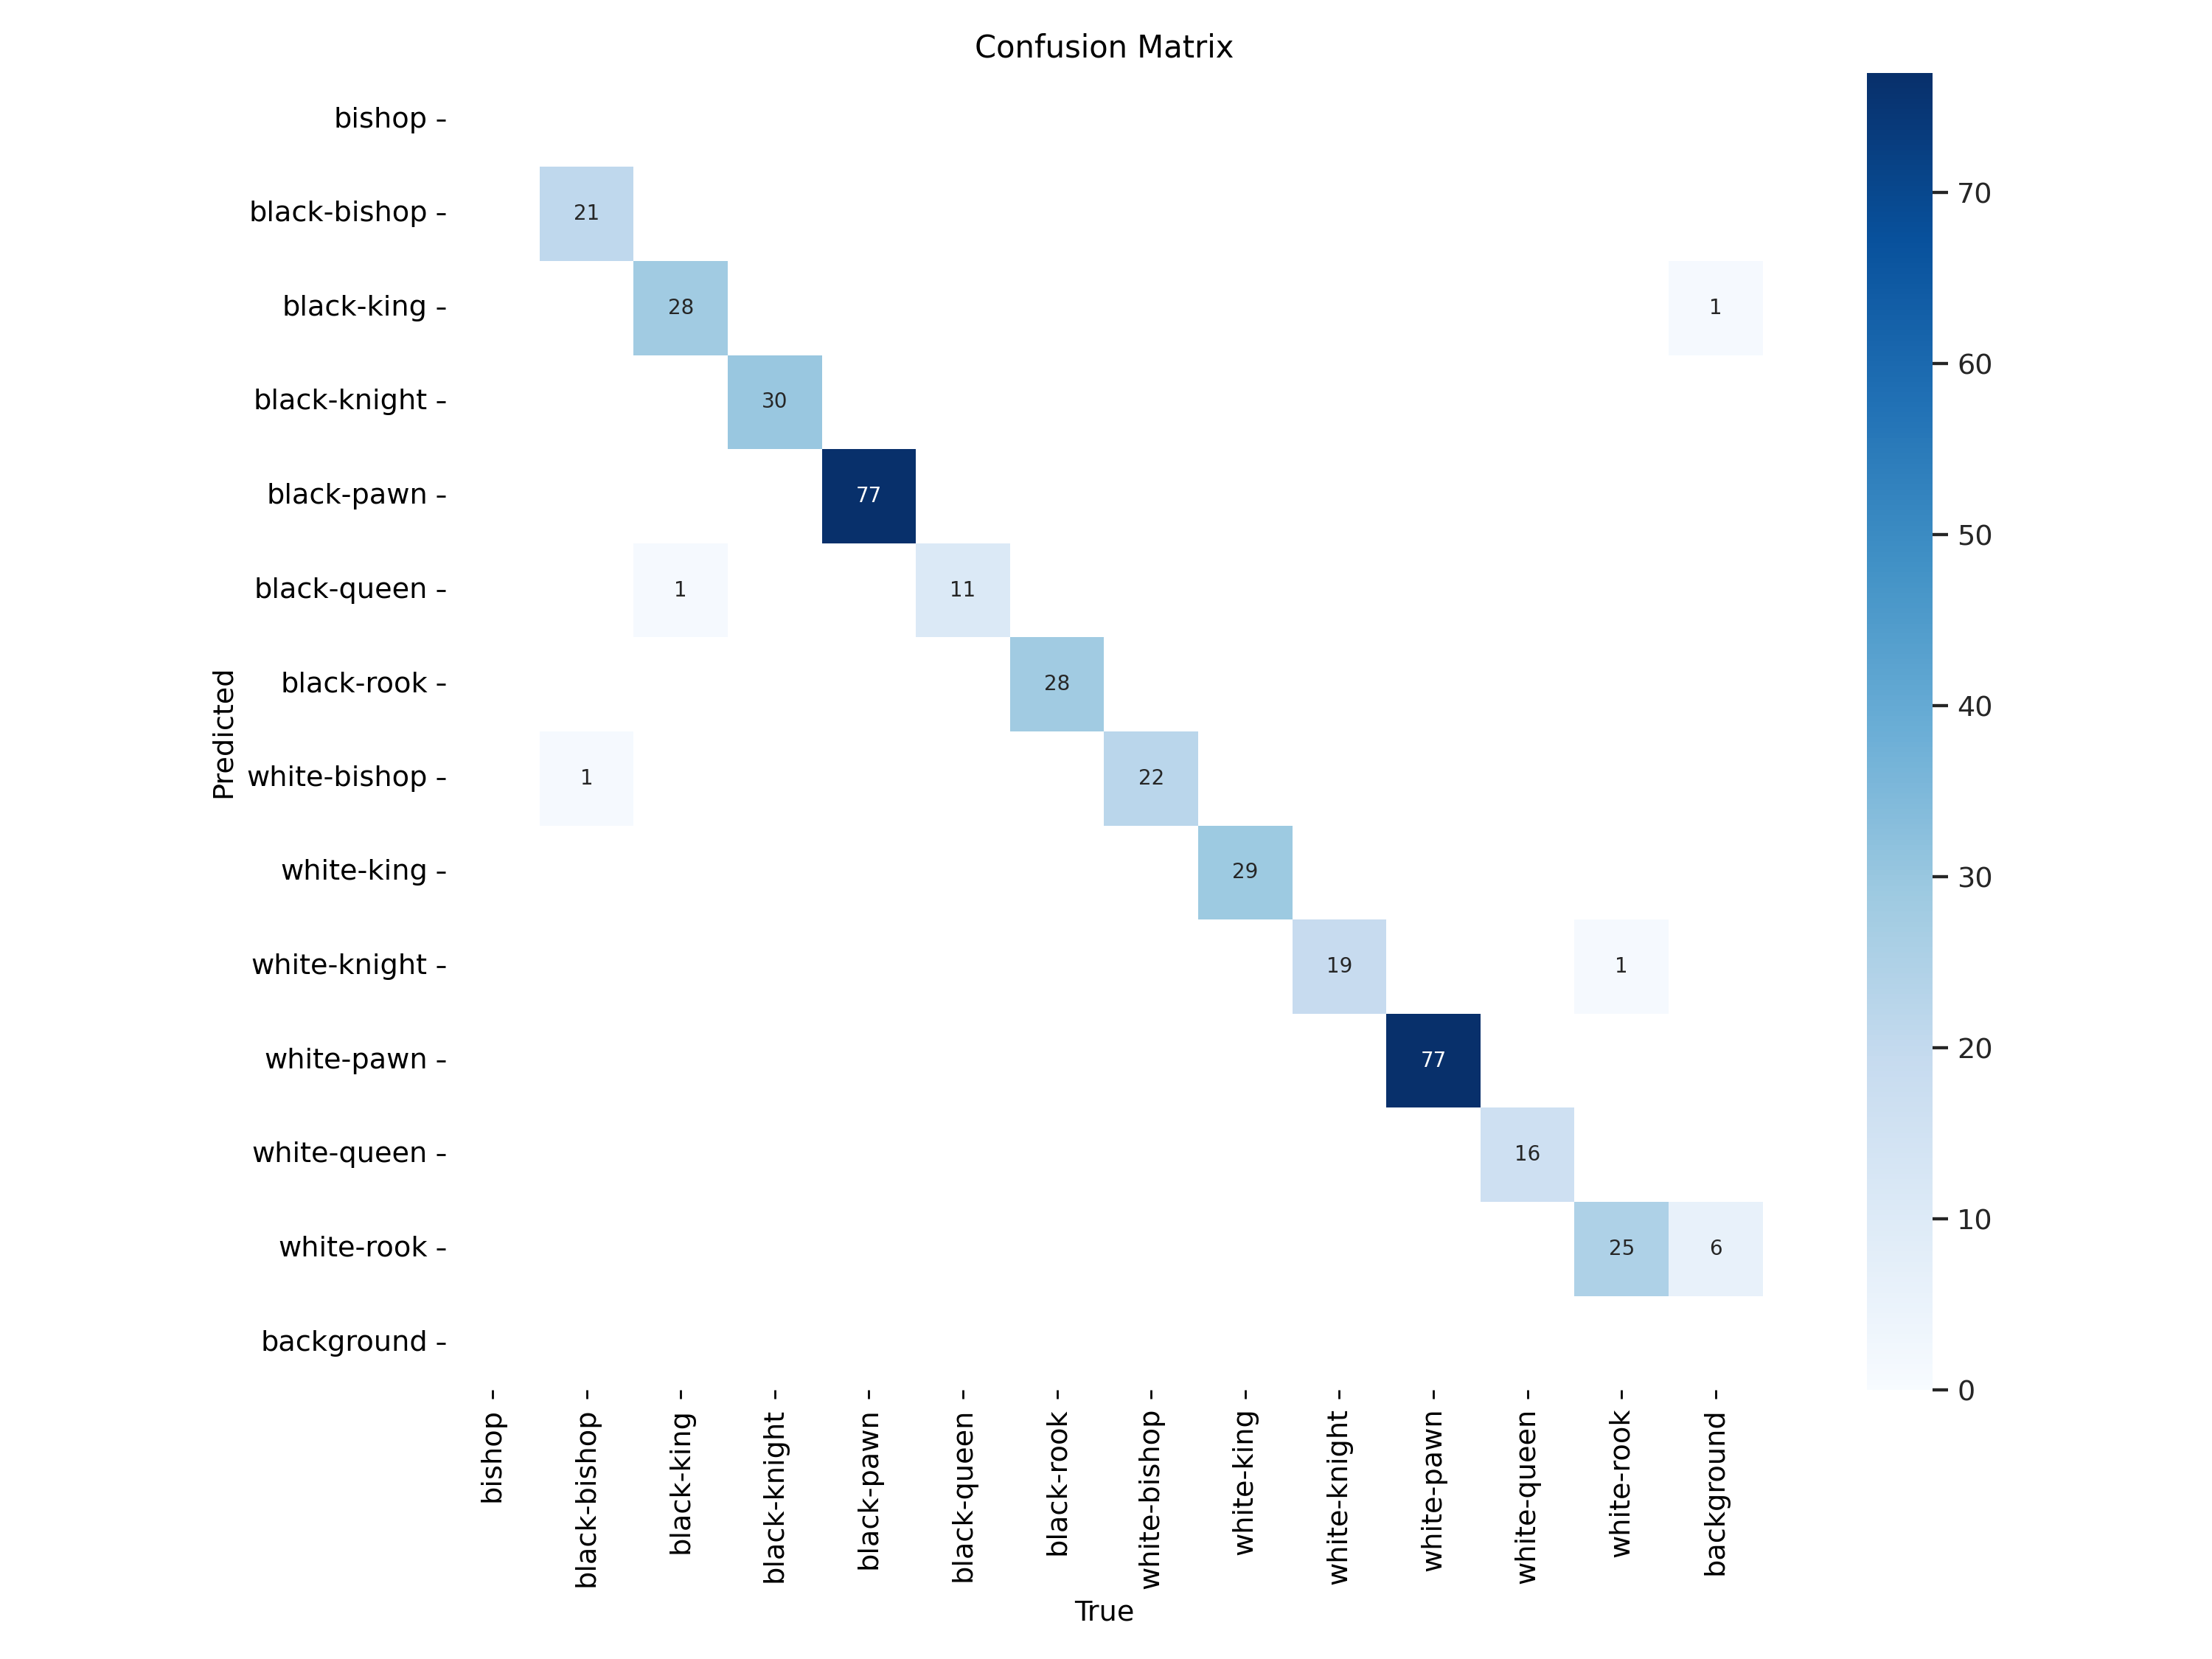

In [53]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=800)

/content


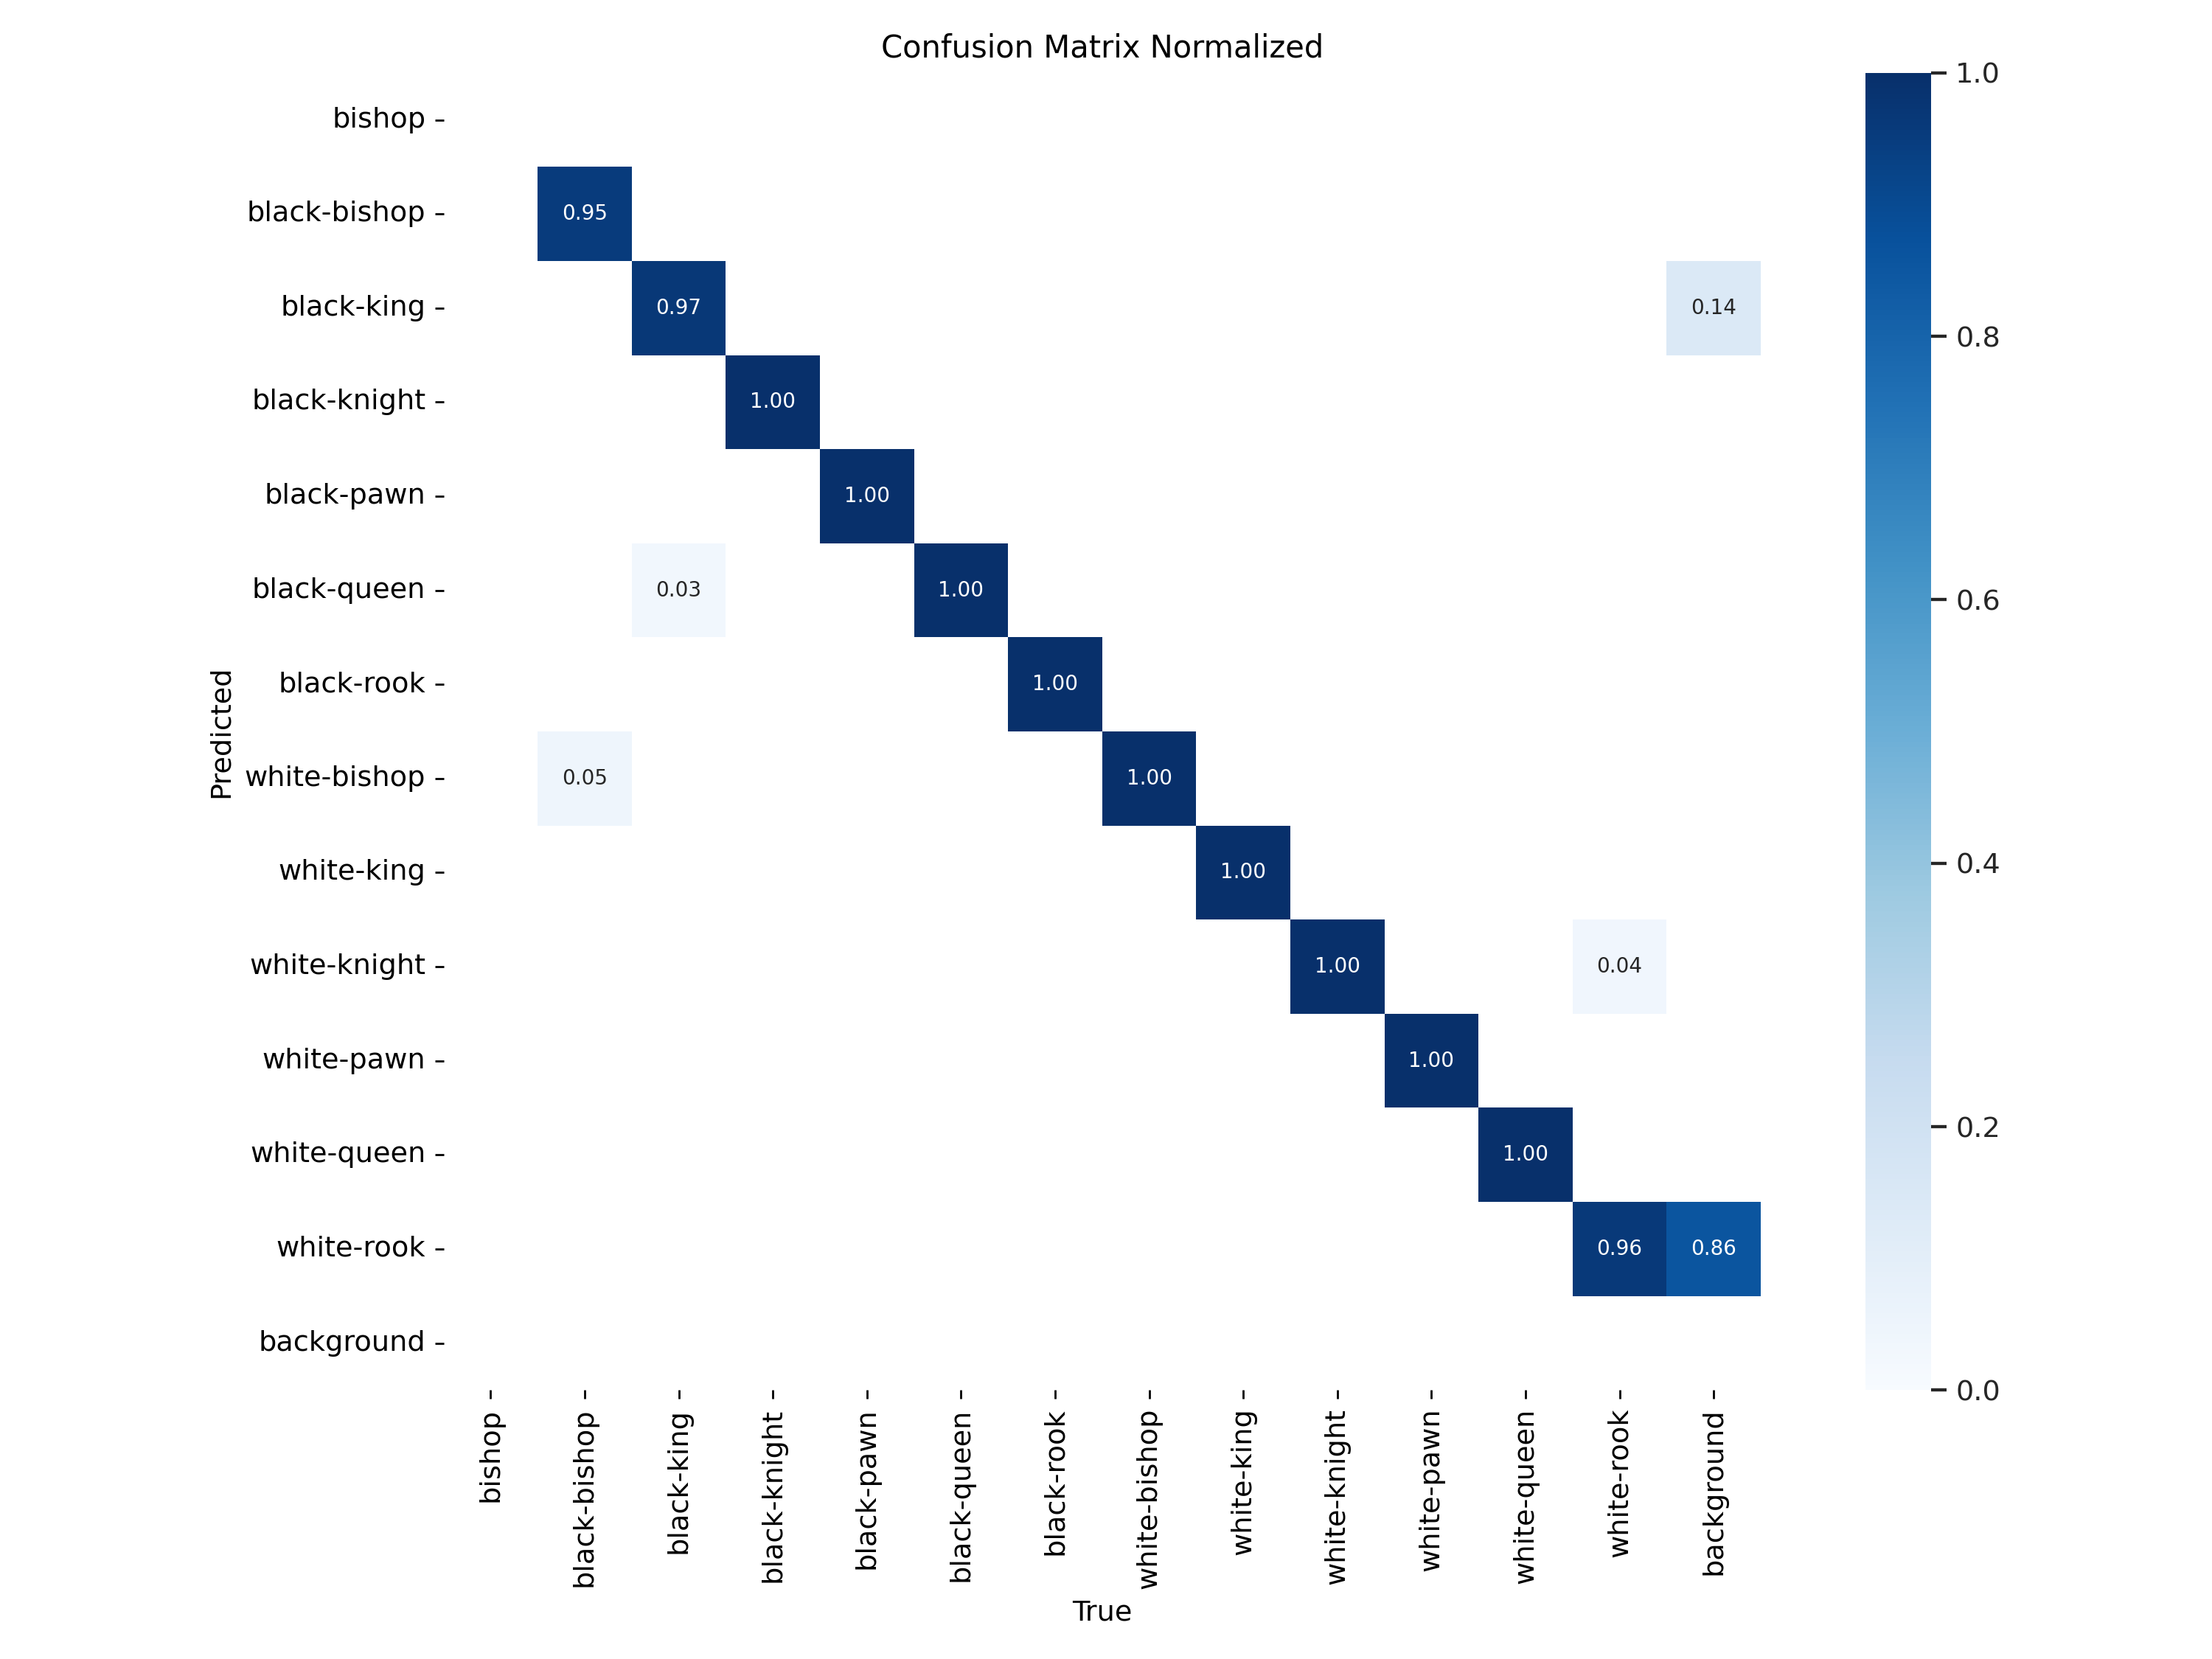

In [71]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=800)

/content


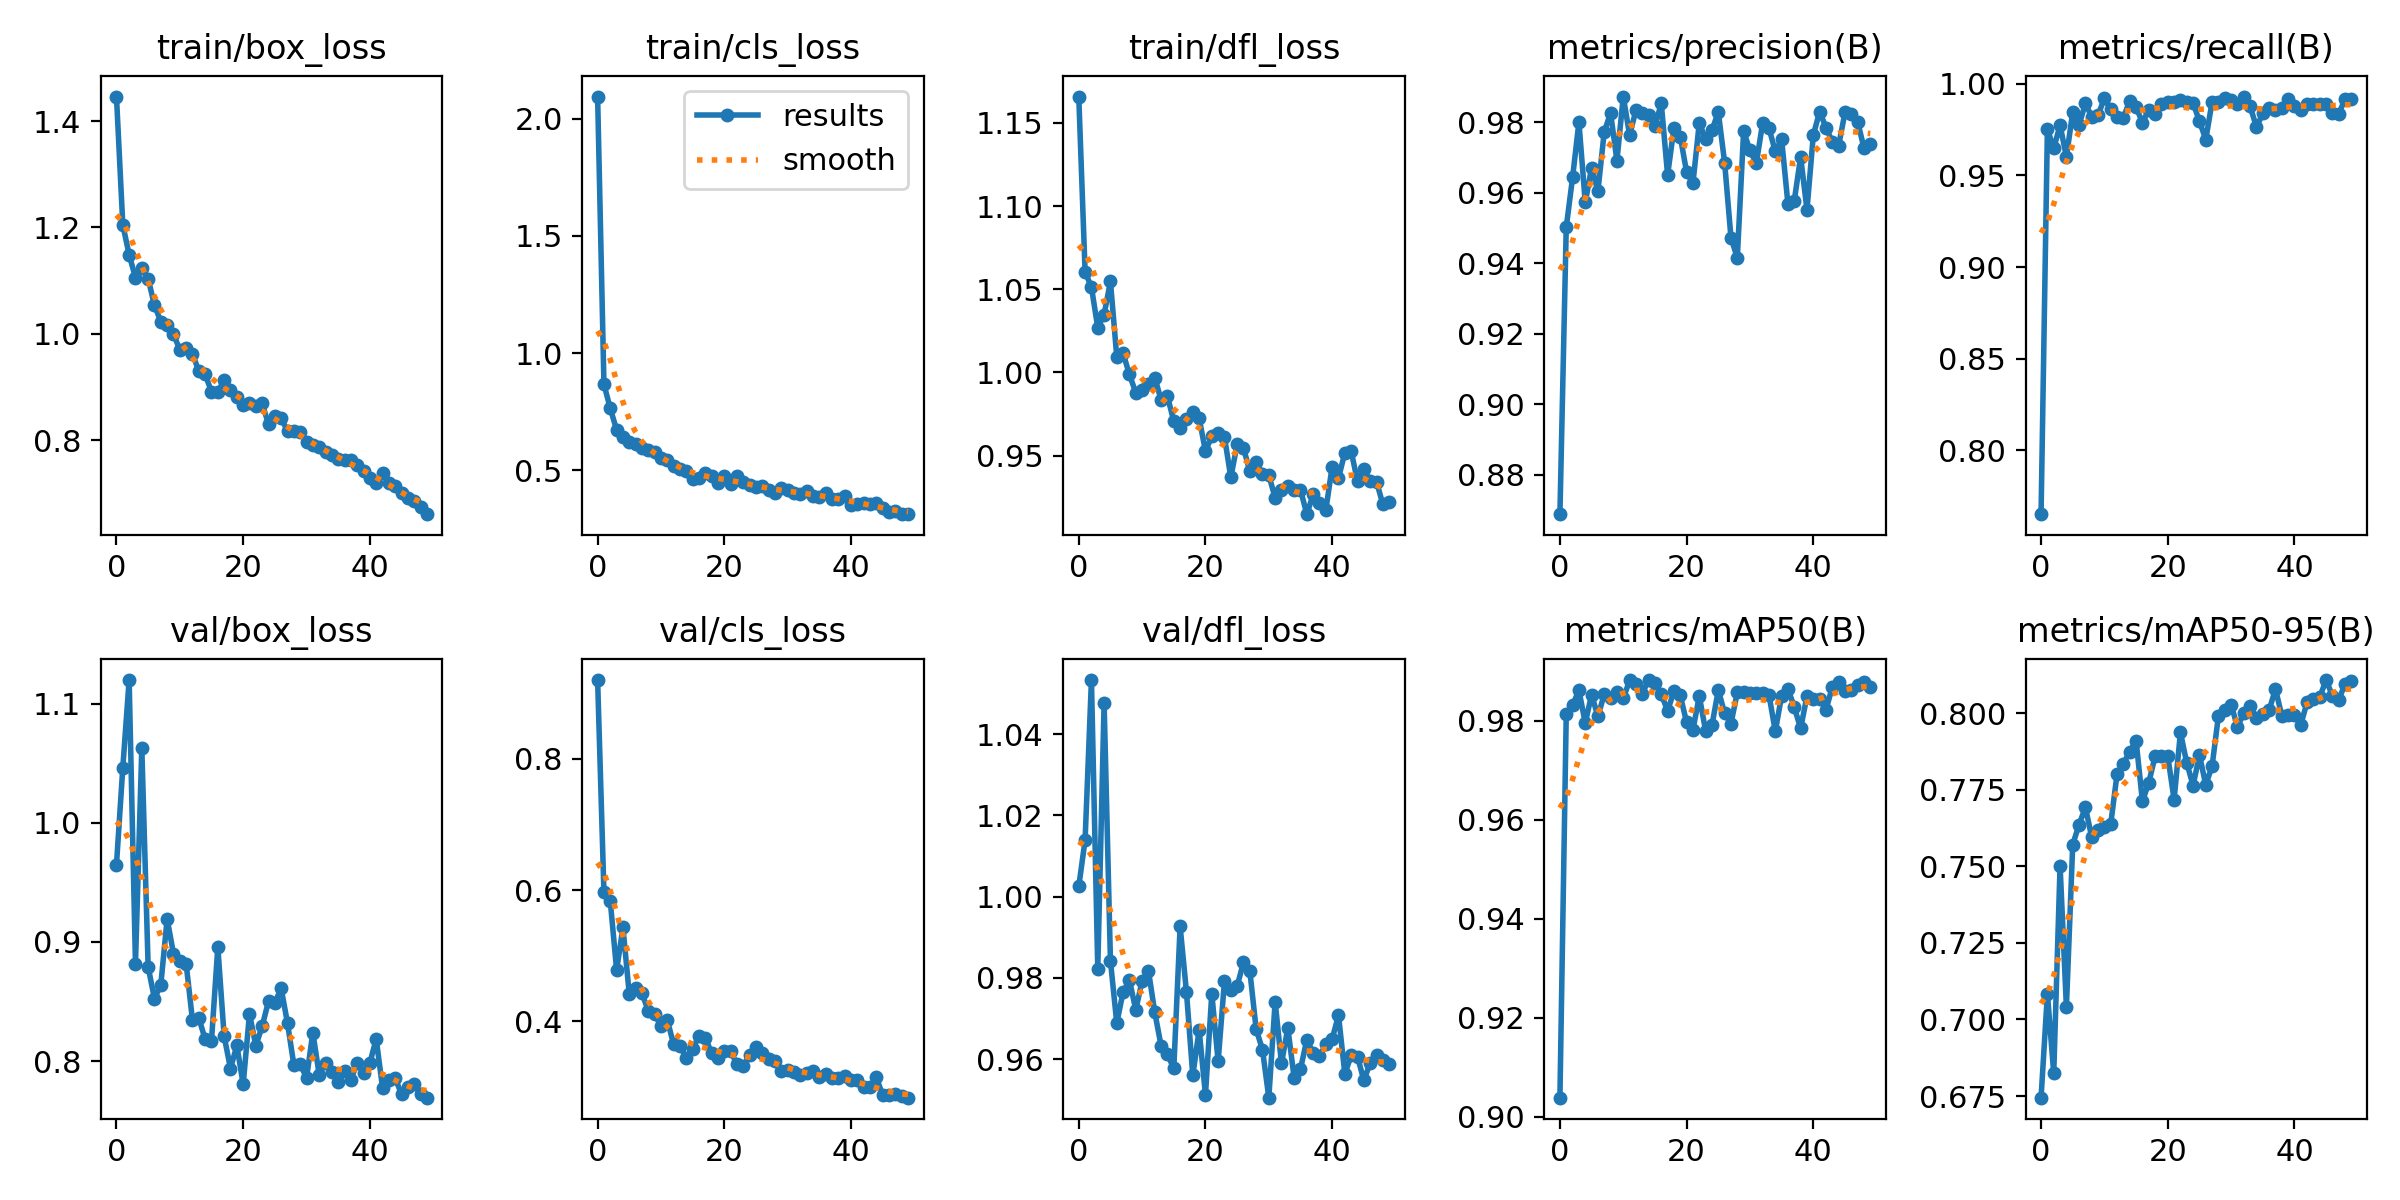

In [59]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=800)

/content


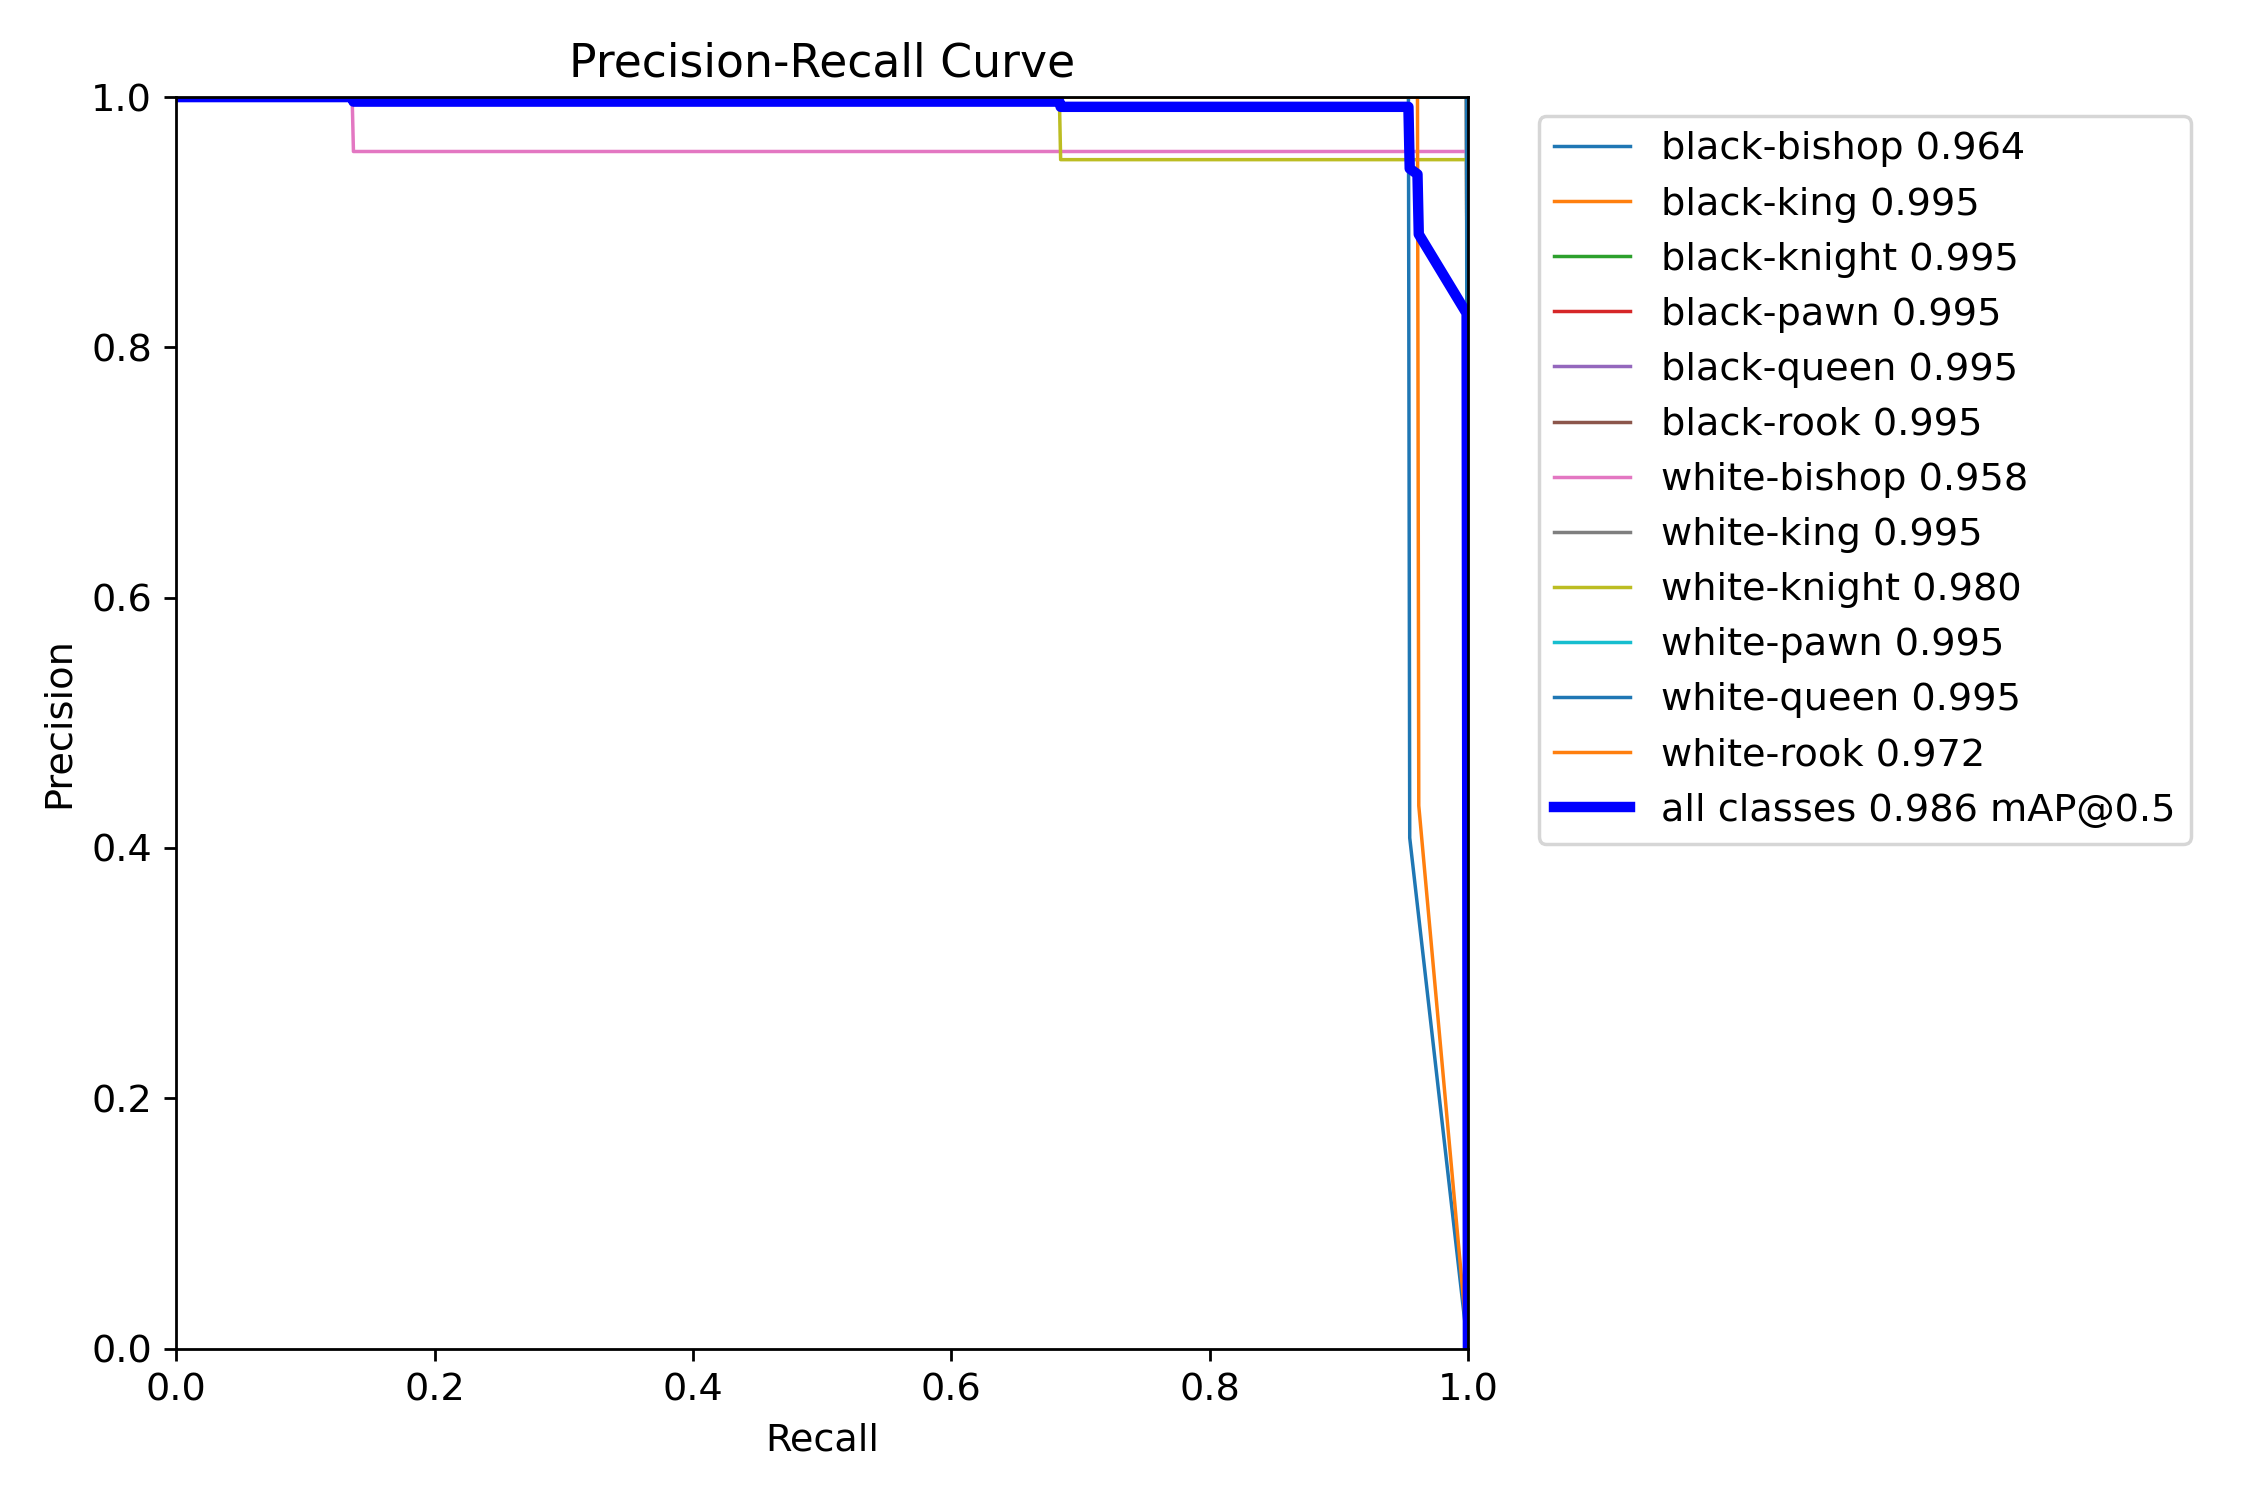

In [62]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=600)

/content


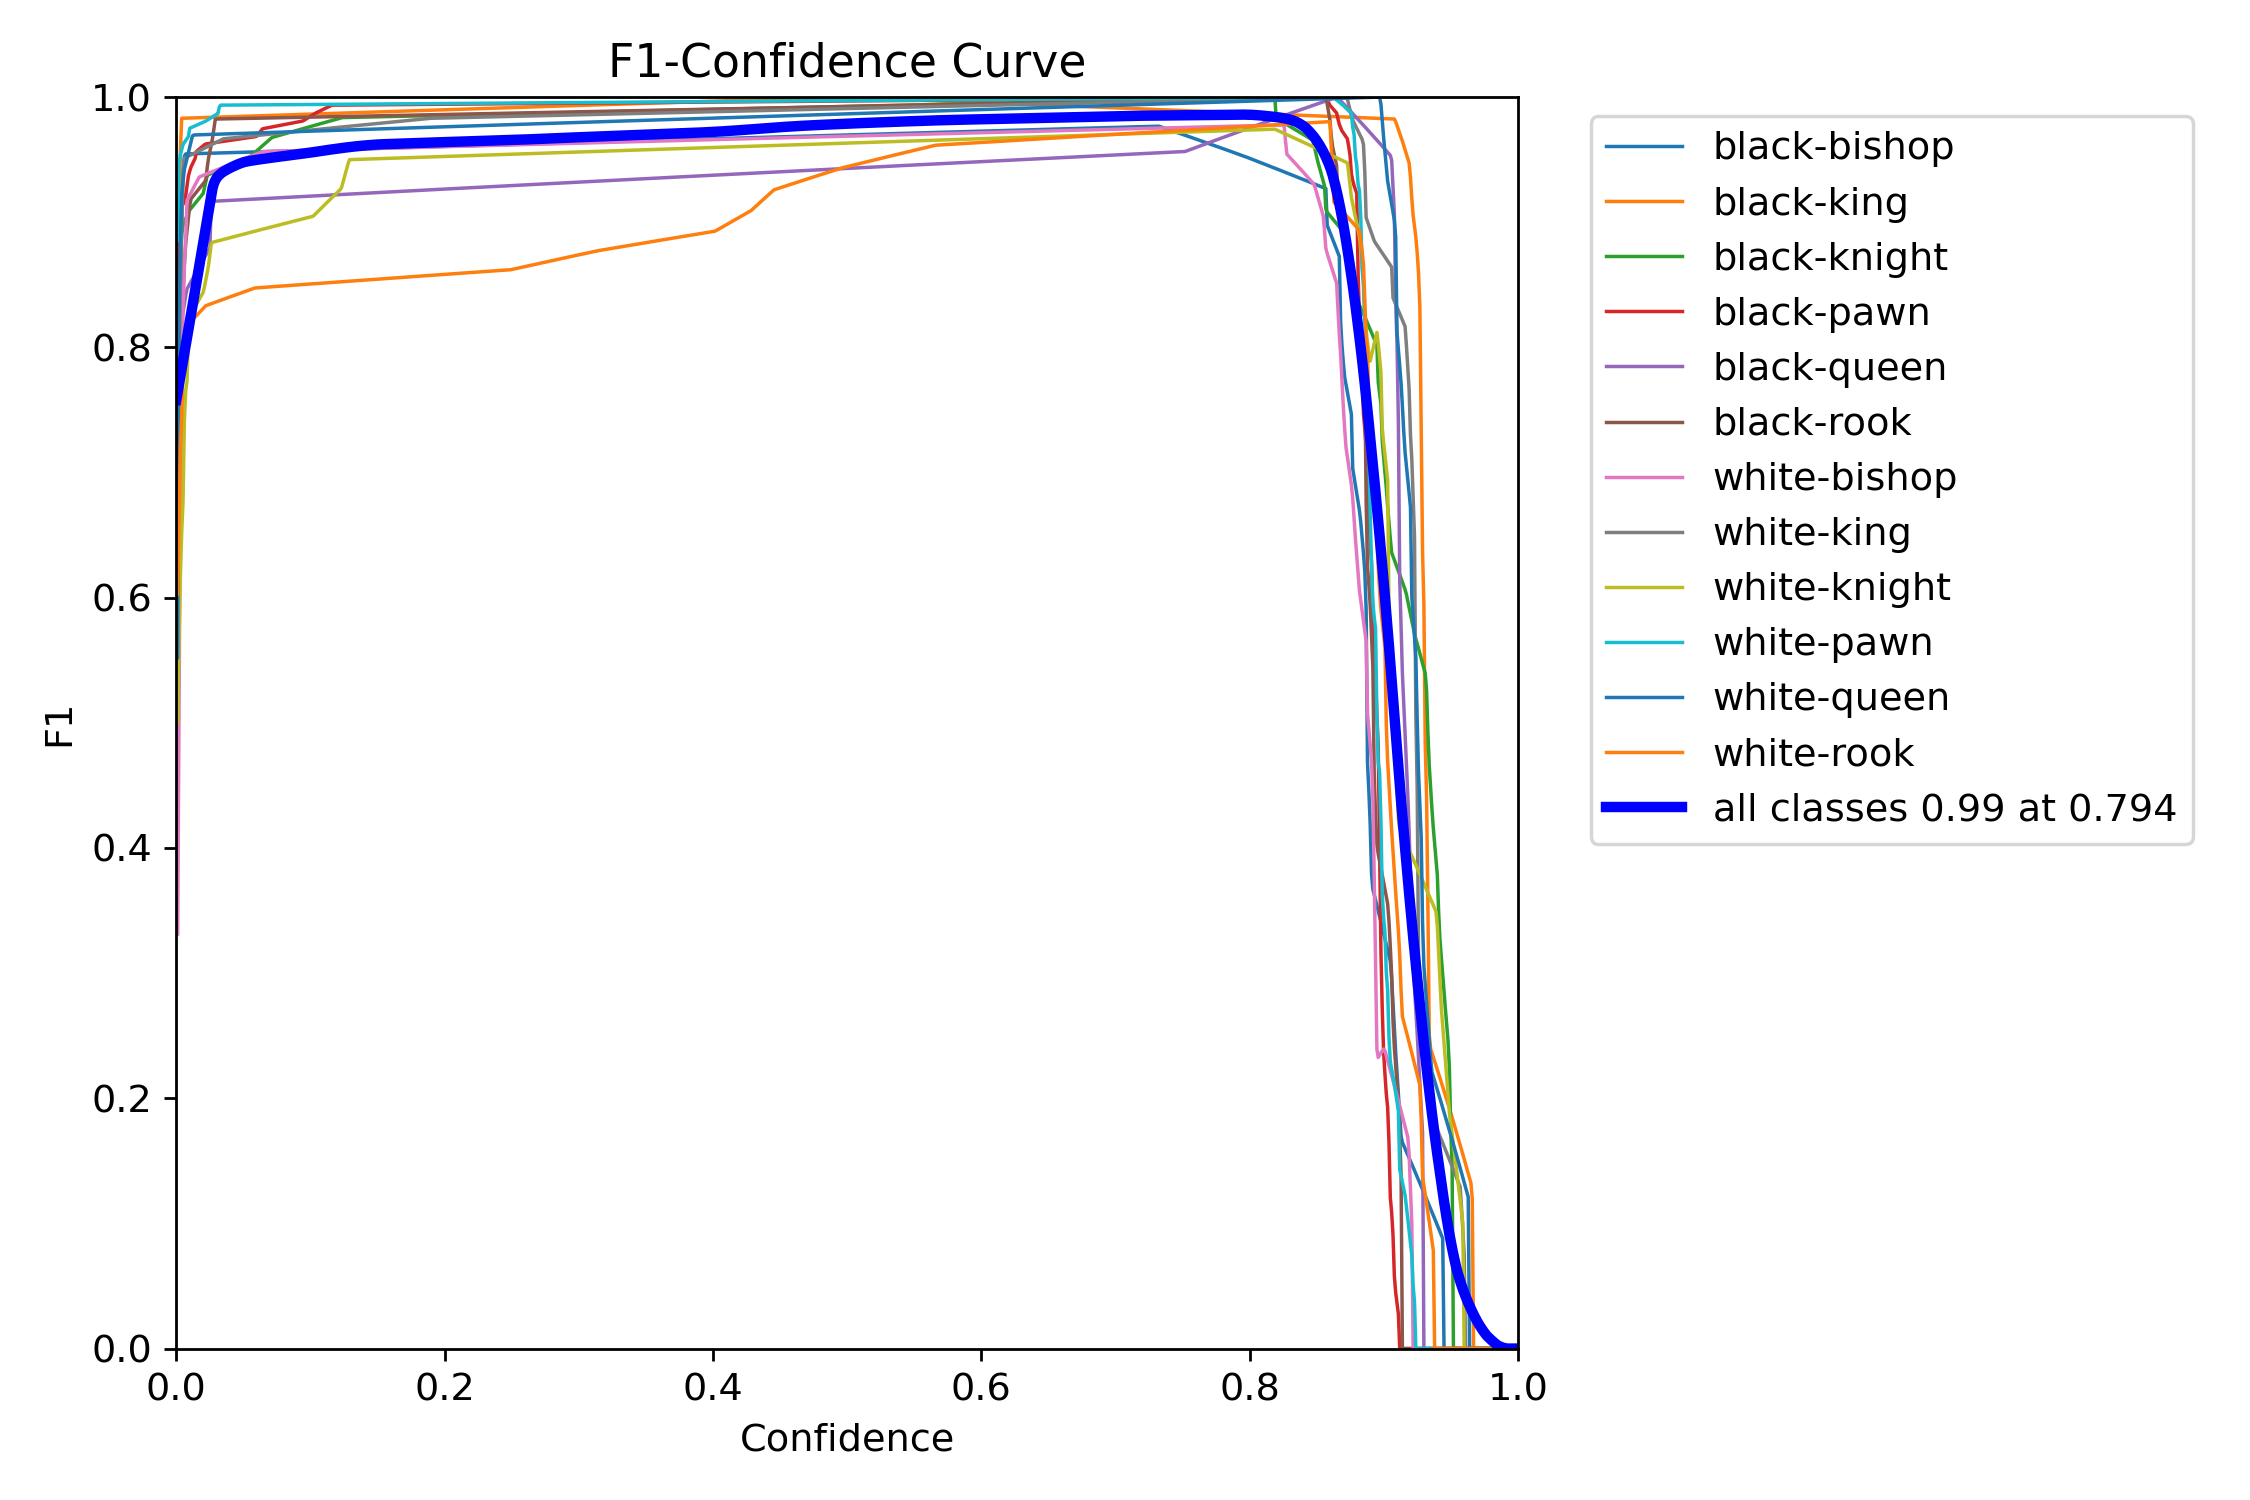

In [64]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

/content


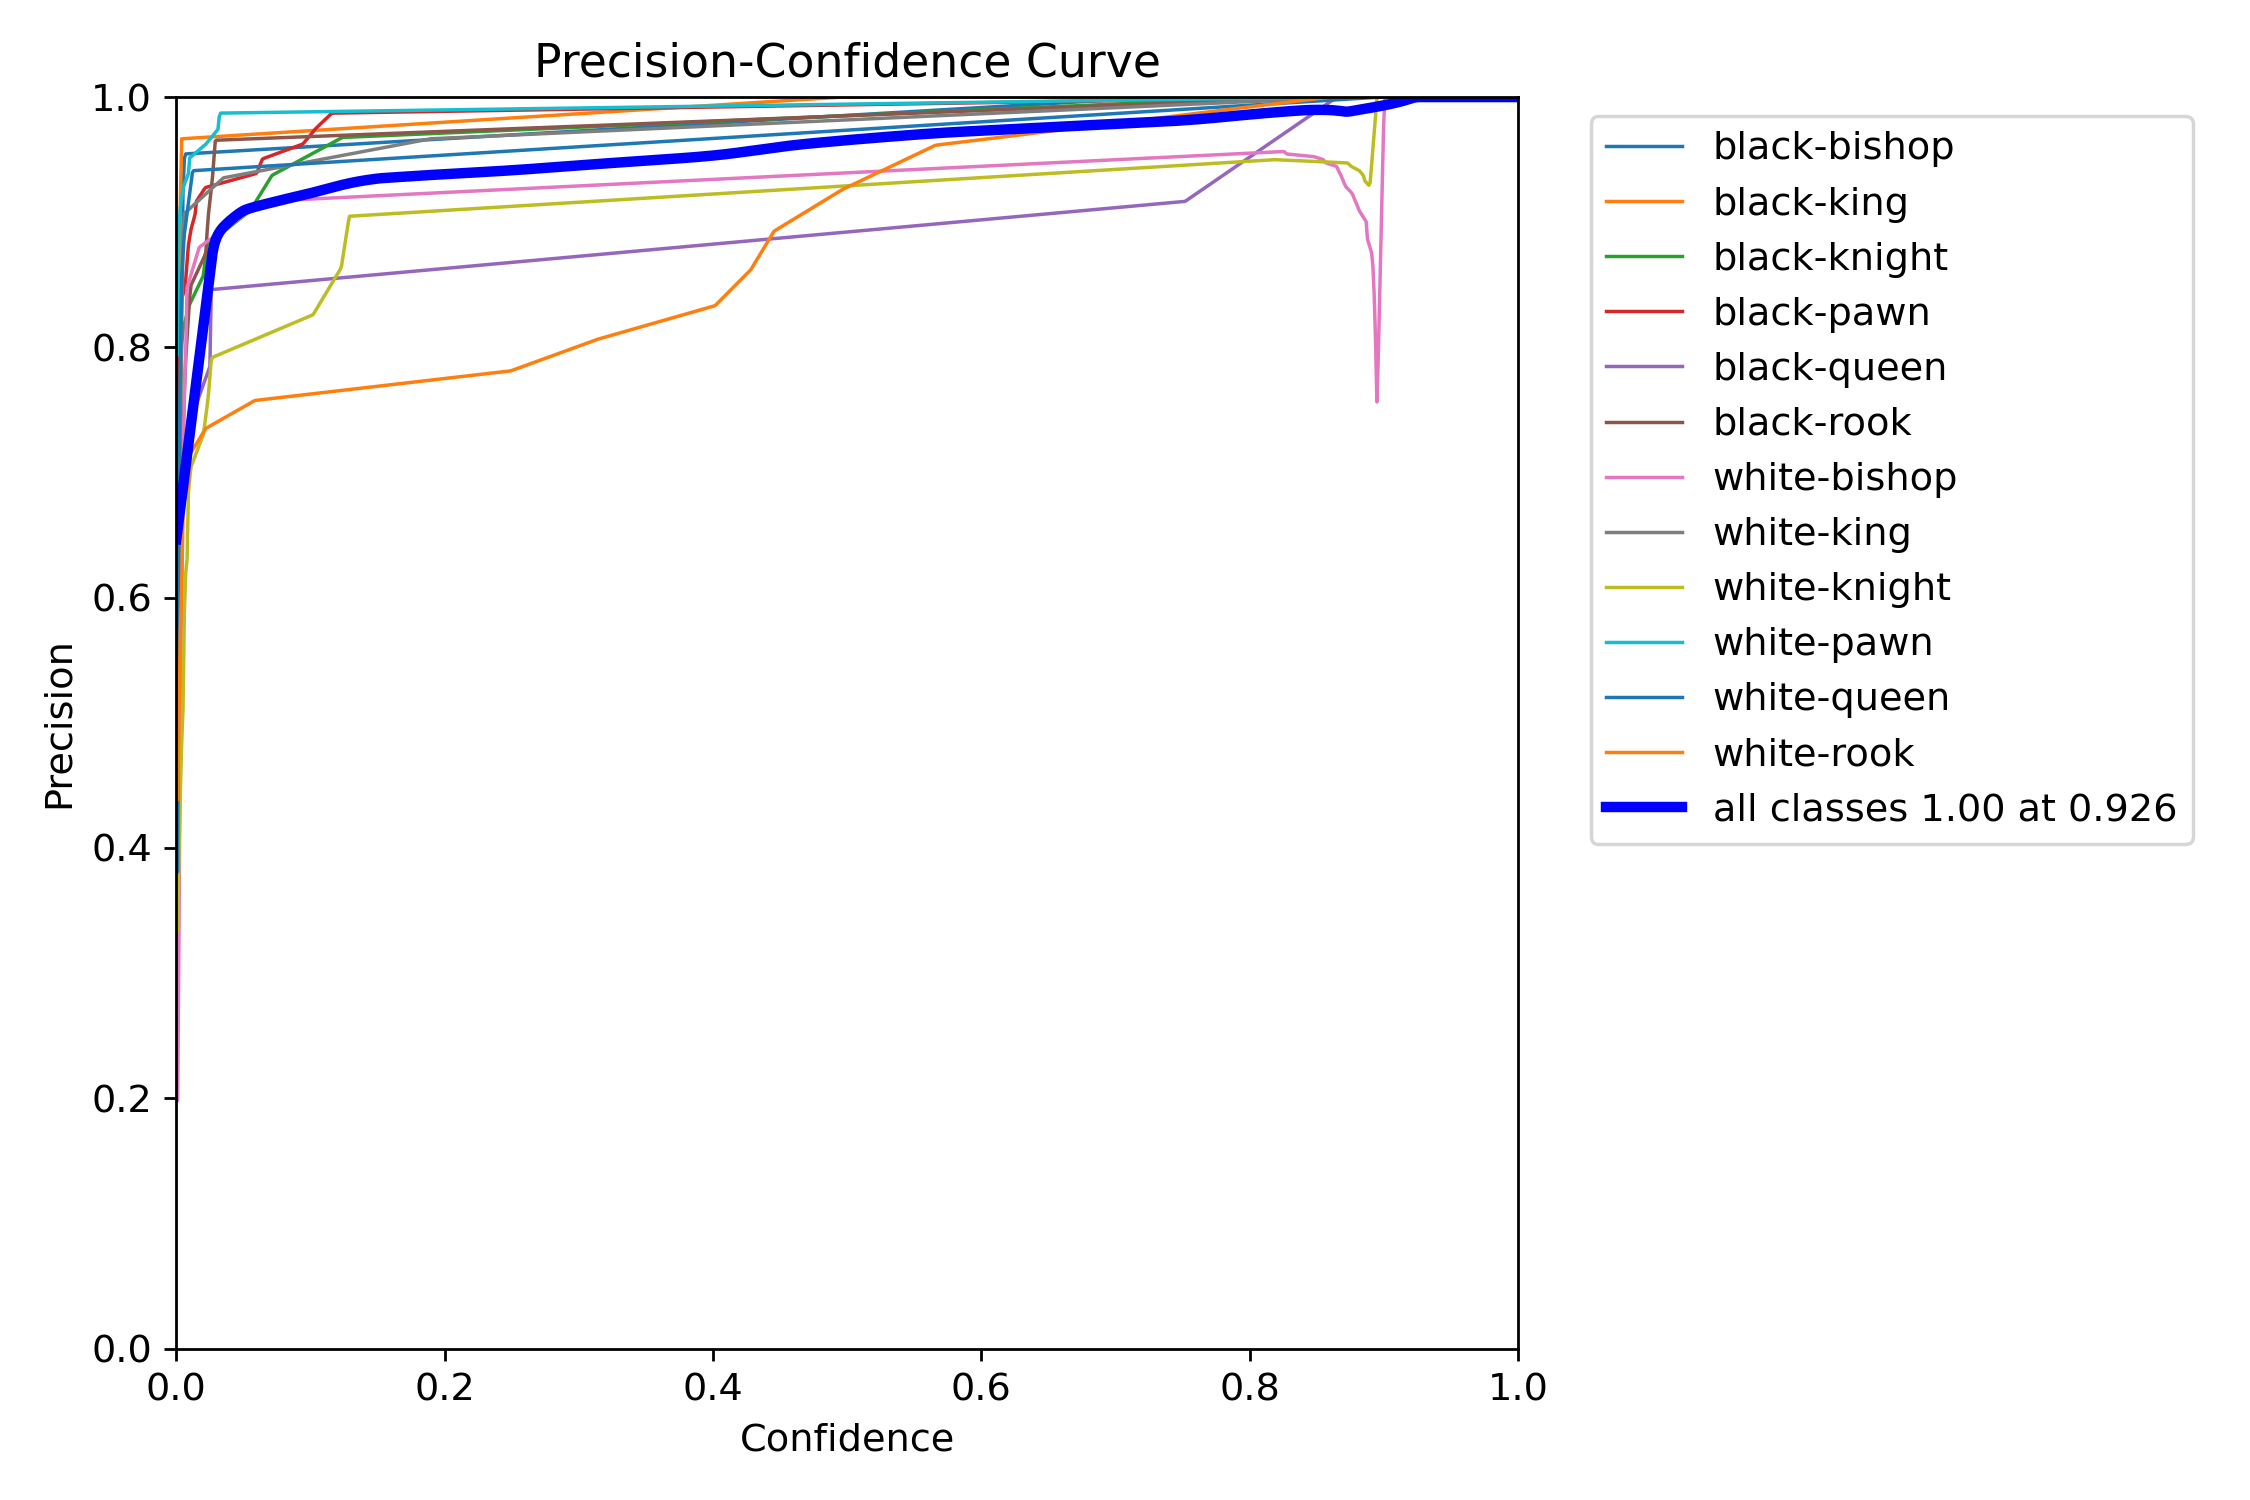

In [65]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=600)

/content


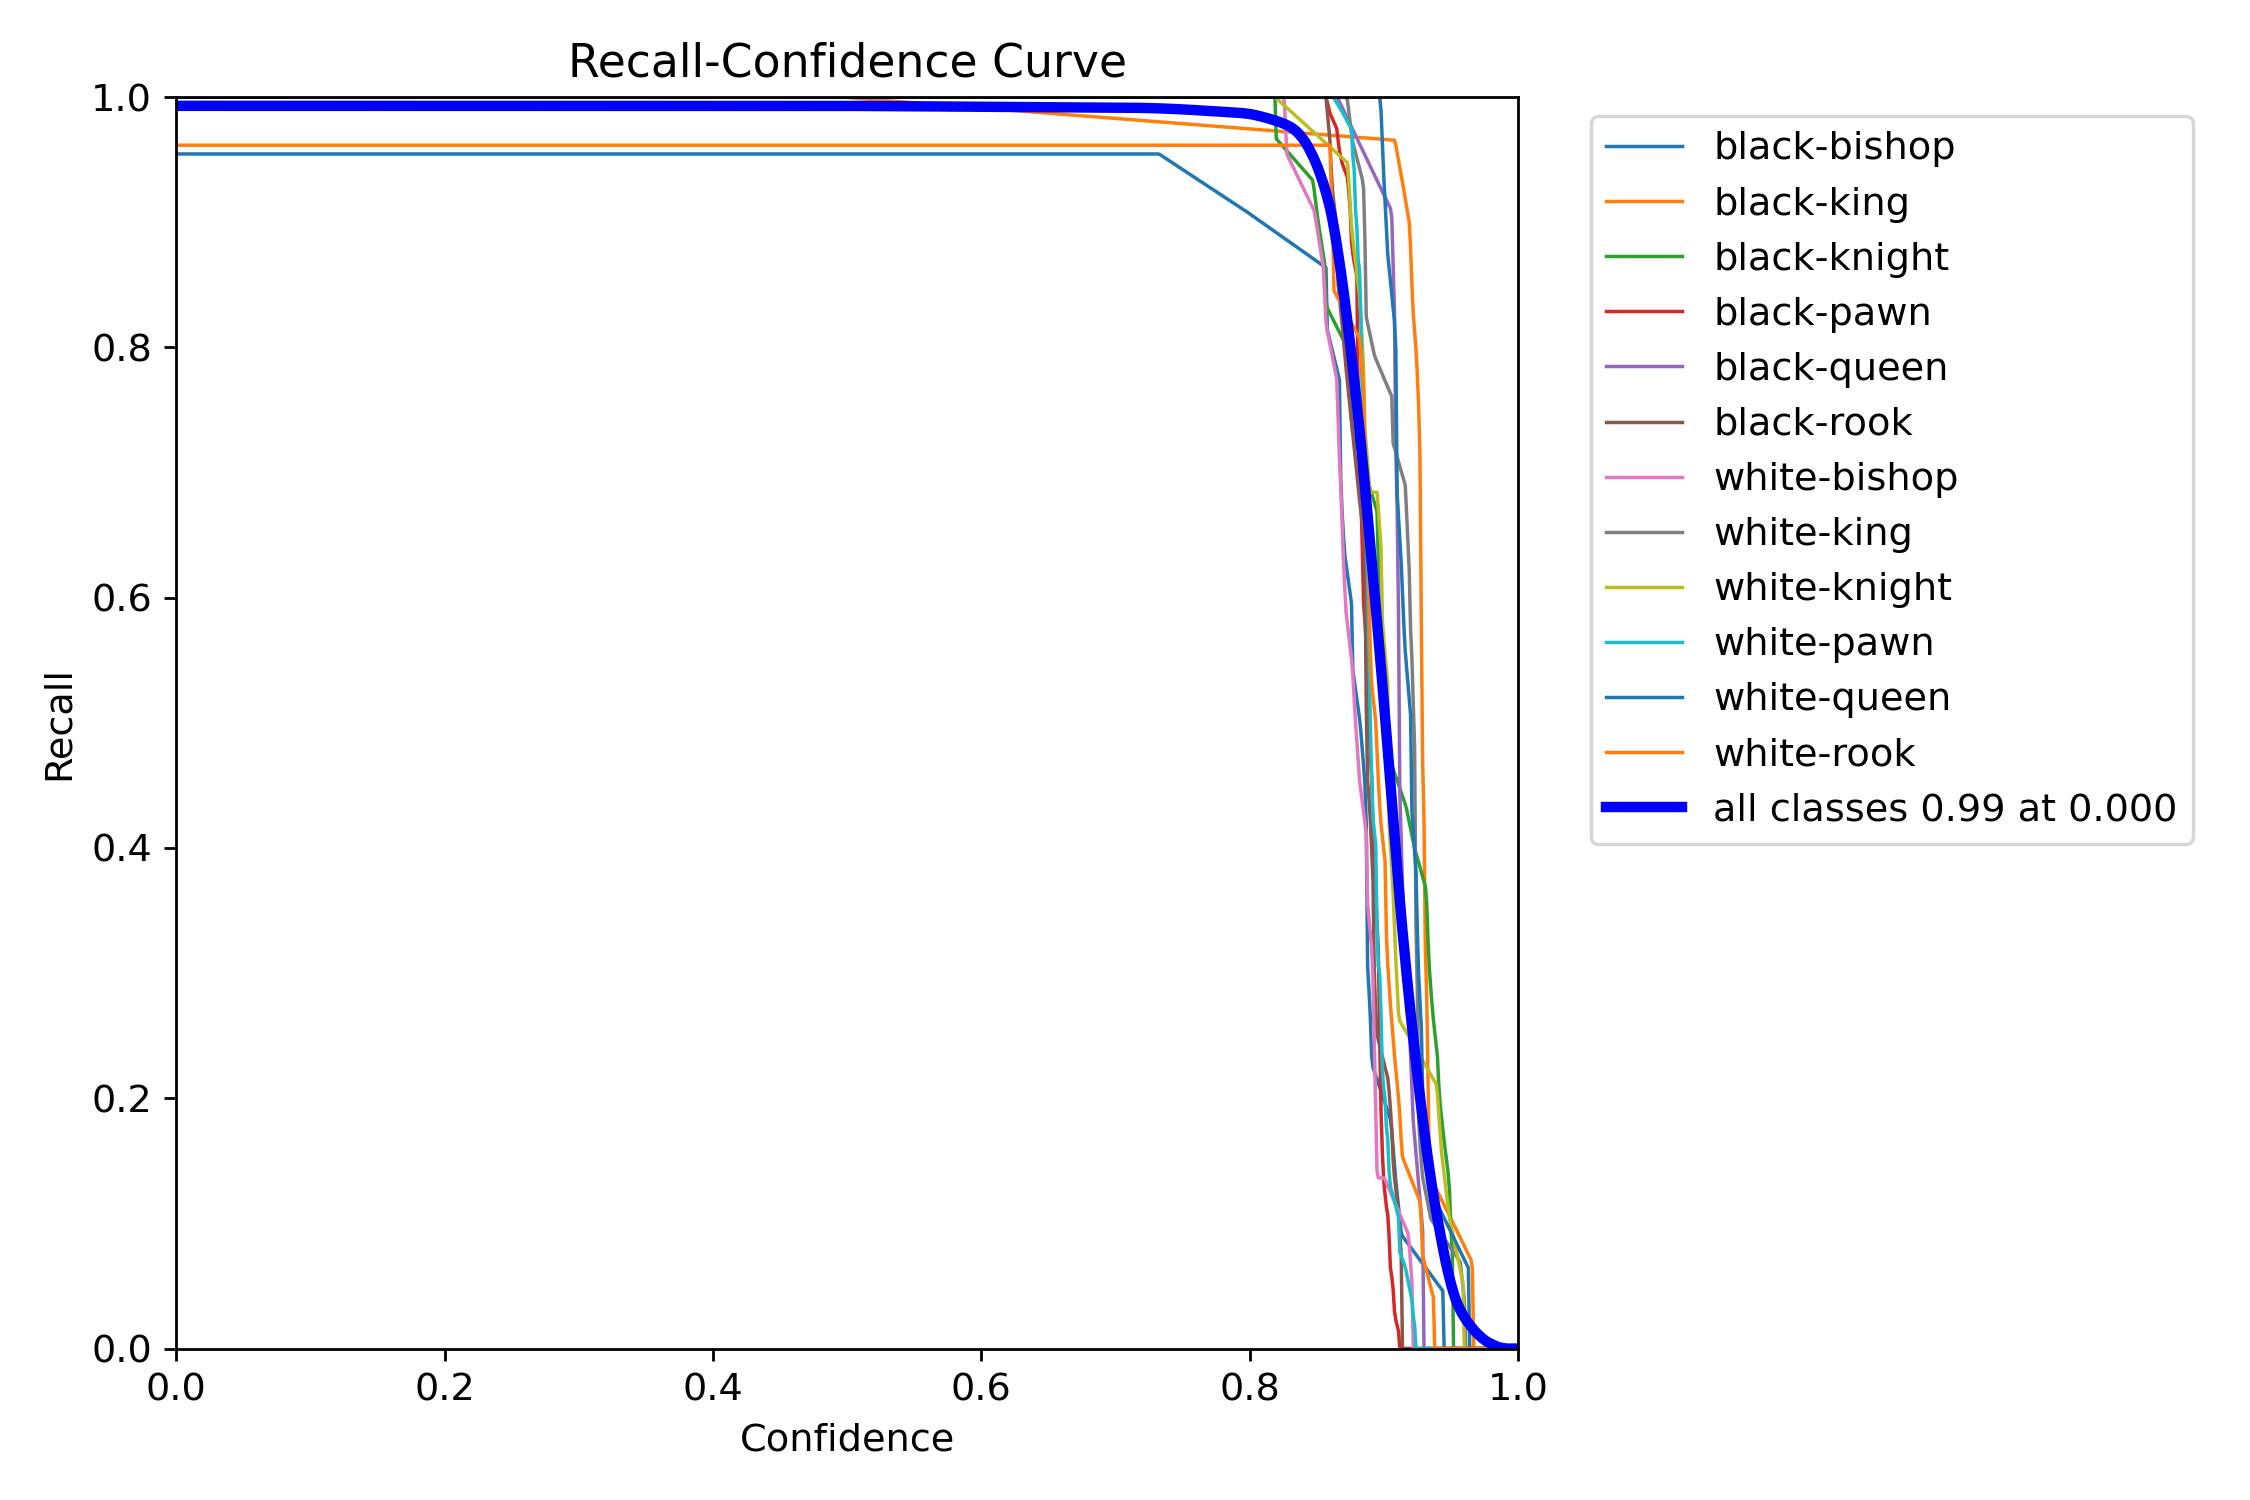

In [66]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/R_curve.png', width=600)

#### Output graphs for validation dataset:

/content


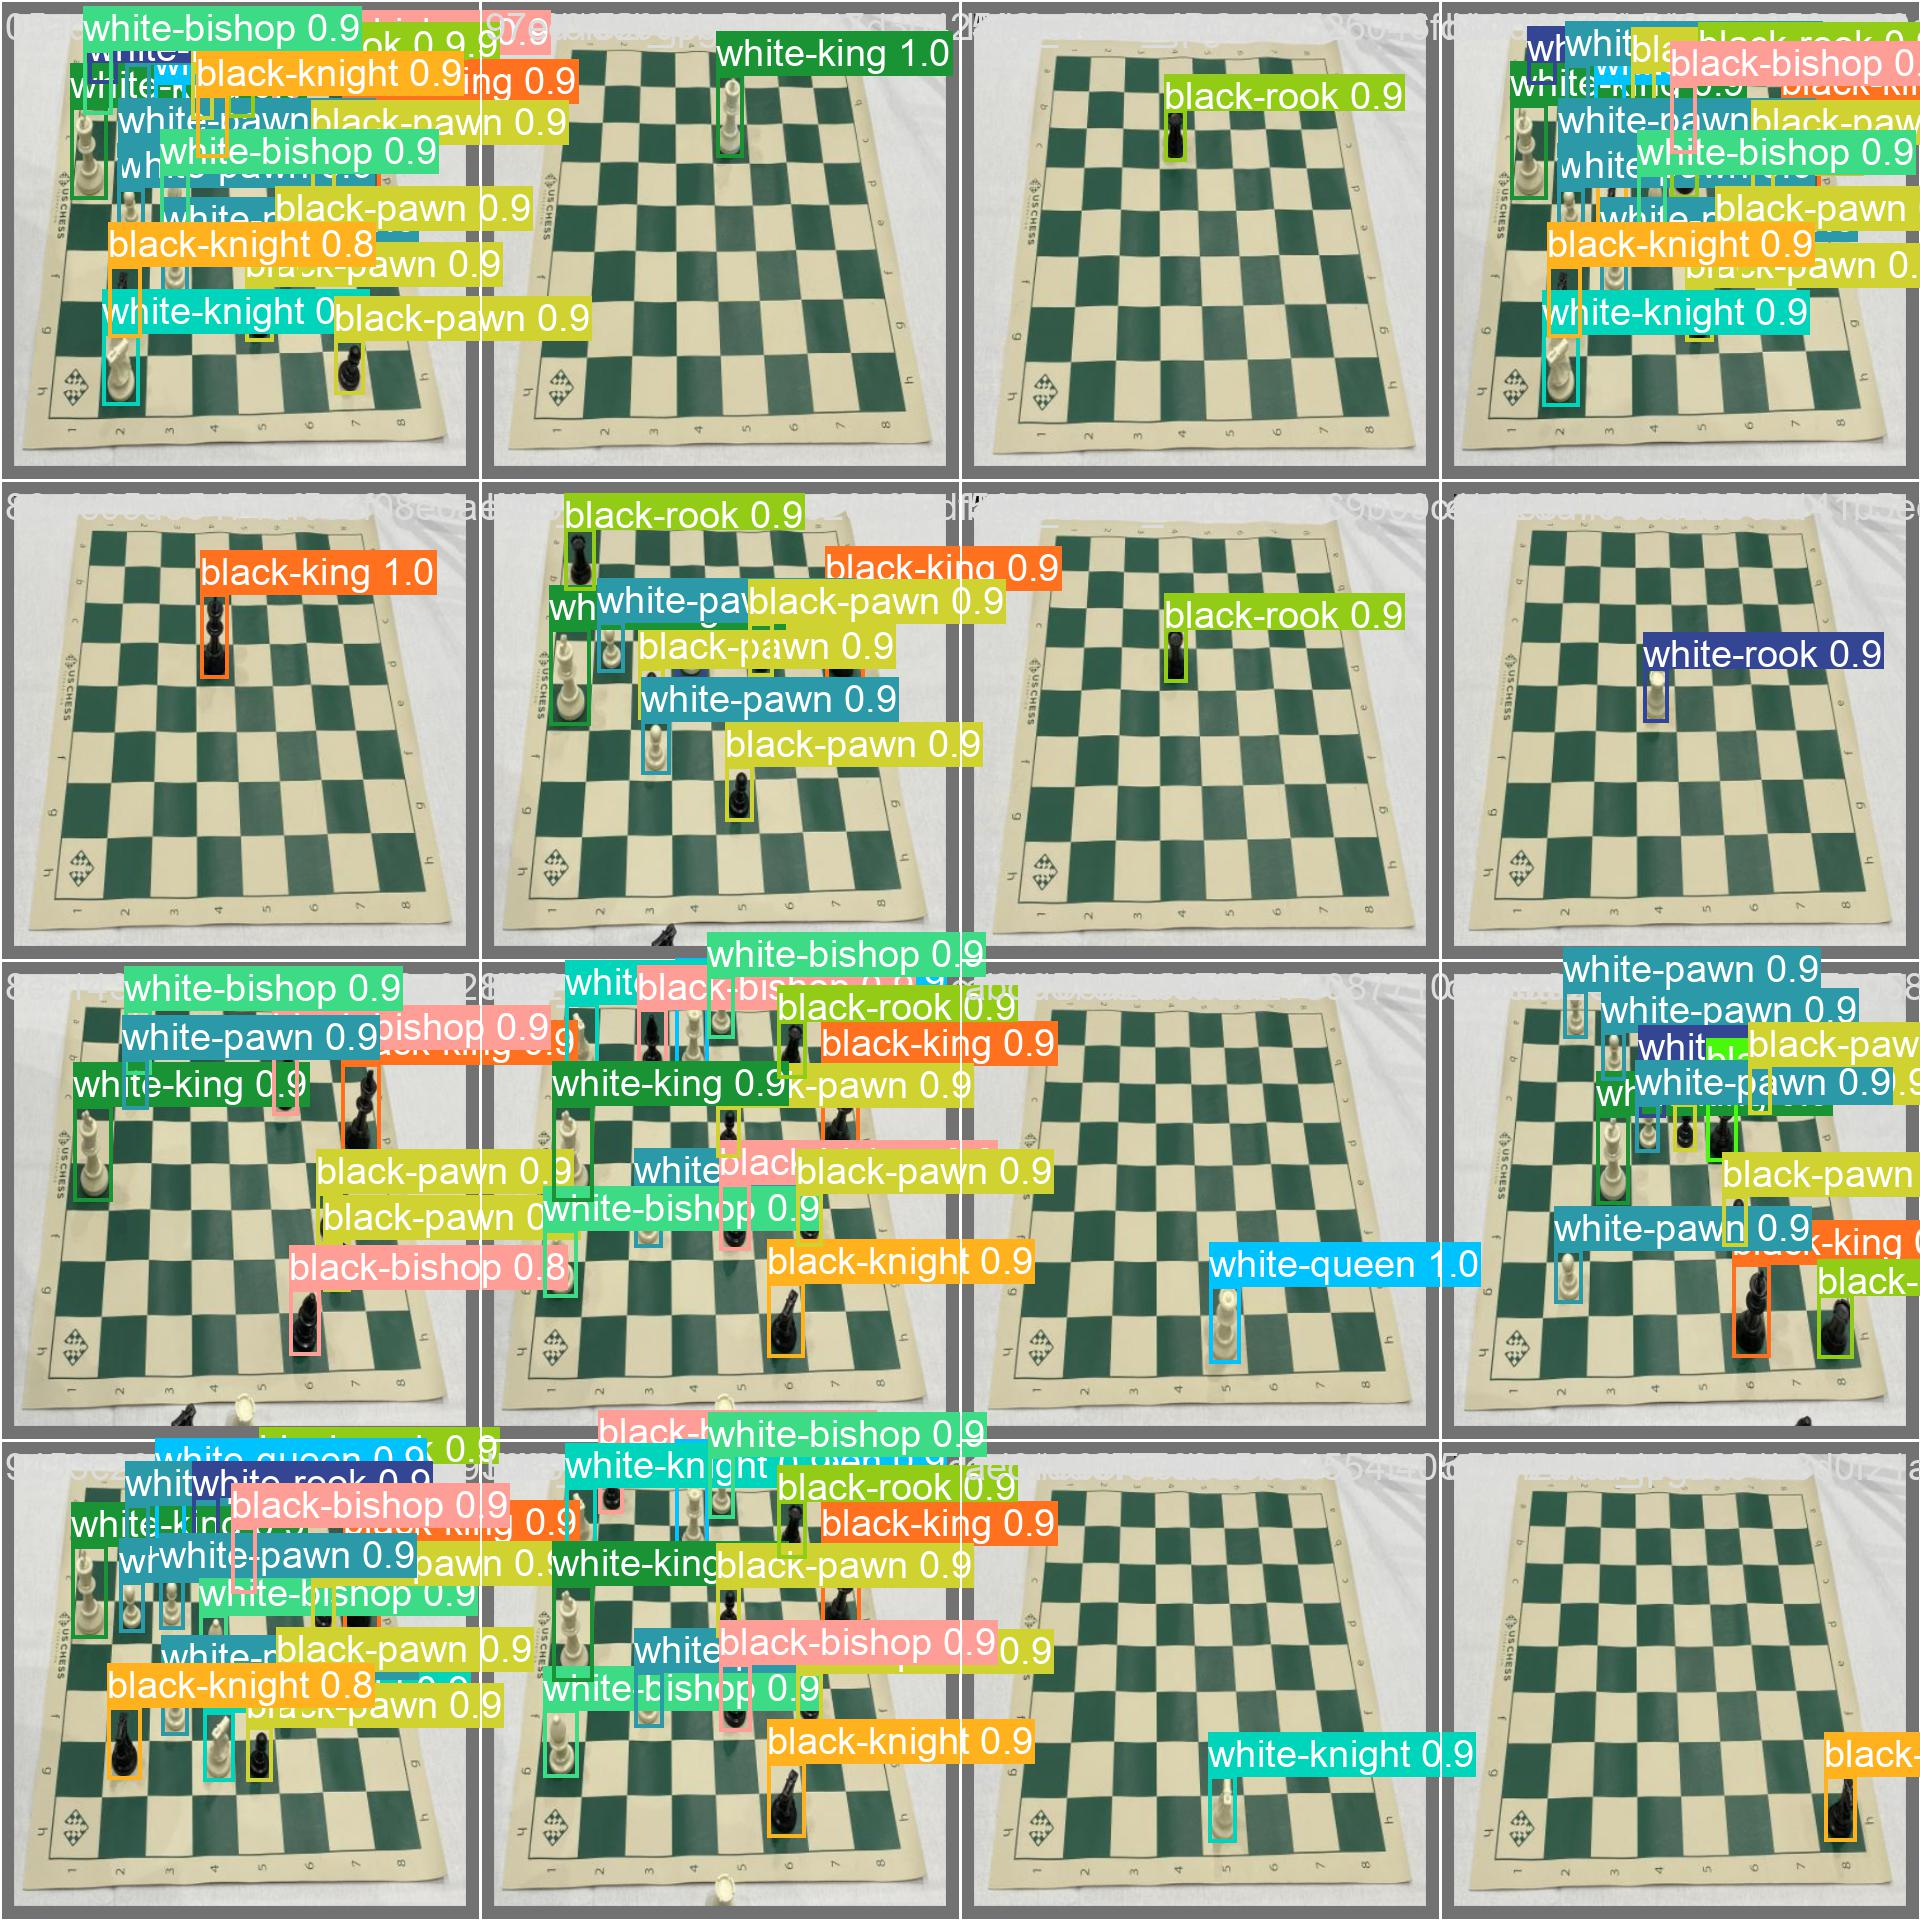

In [61]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/val_batch0_pred.jpg', width=600)

/content


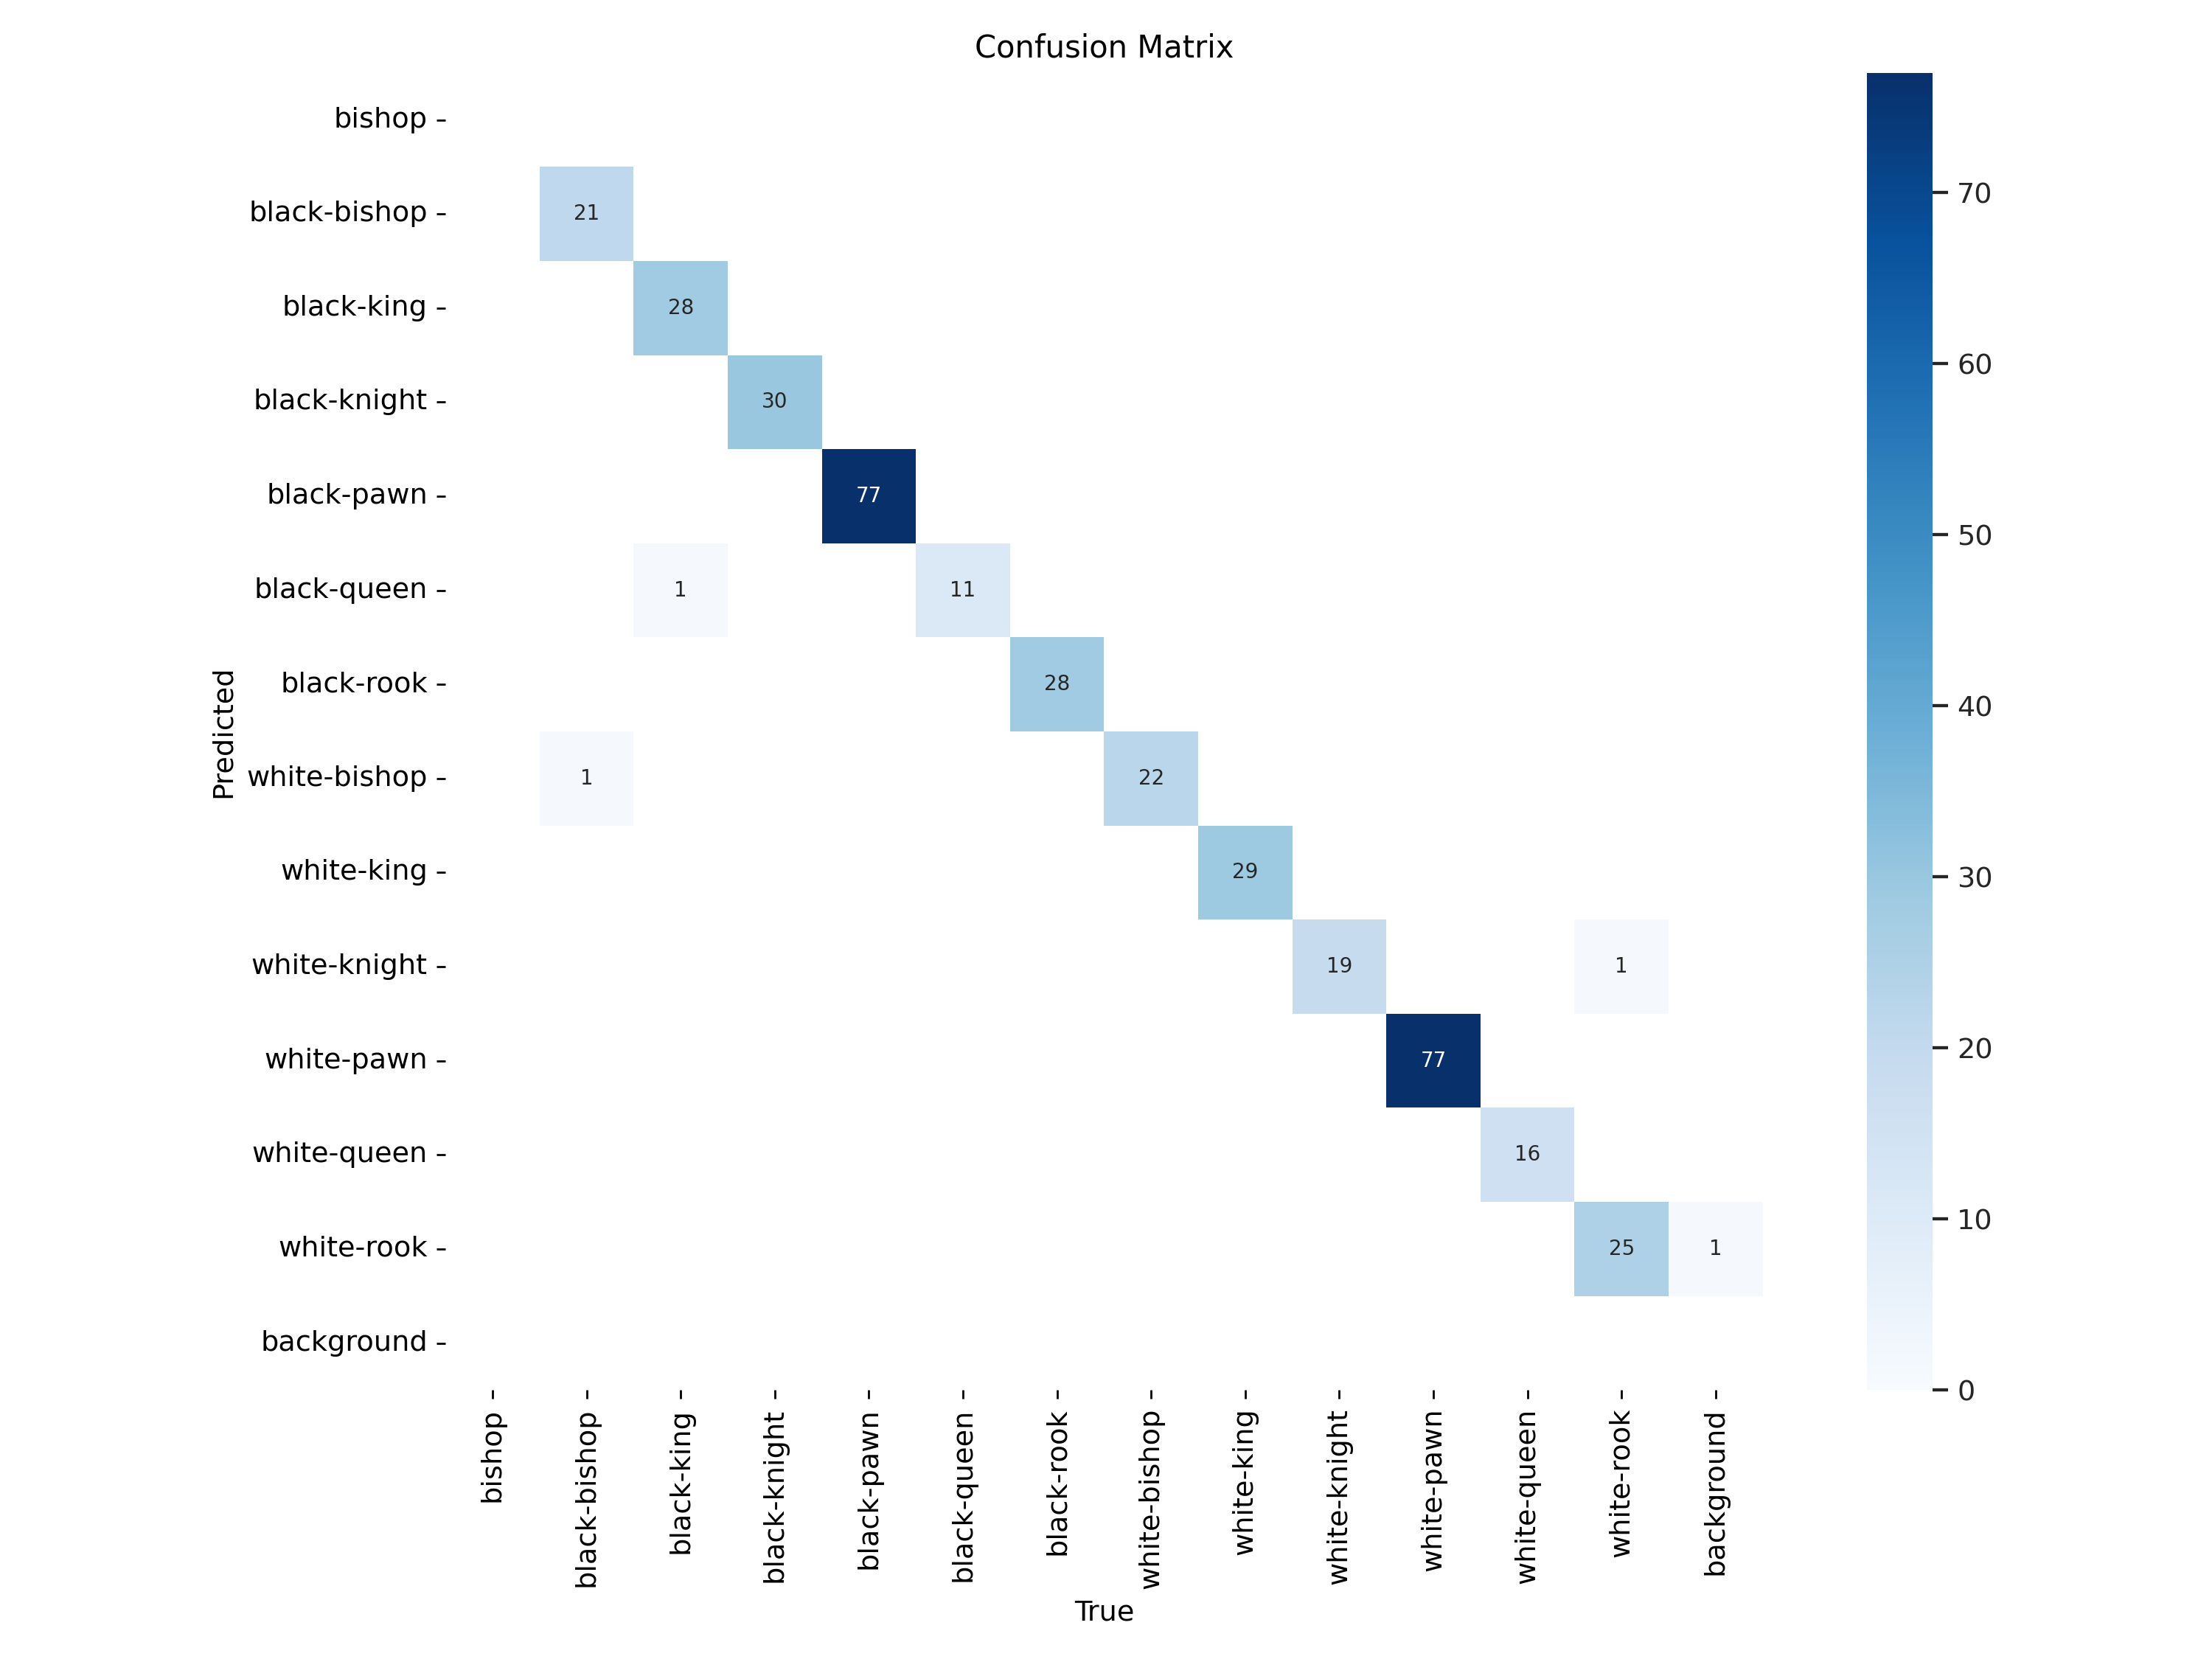

In [58]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix.png', width=800)

/content


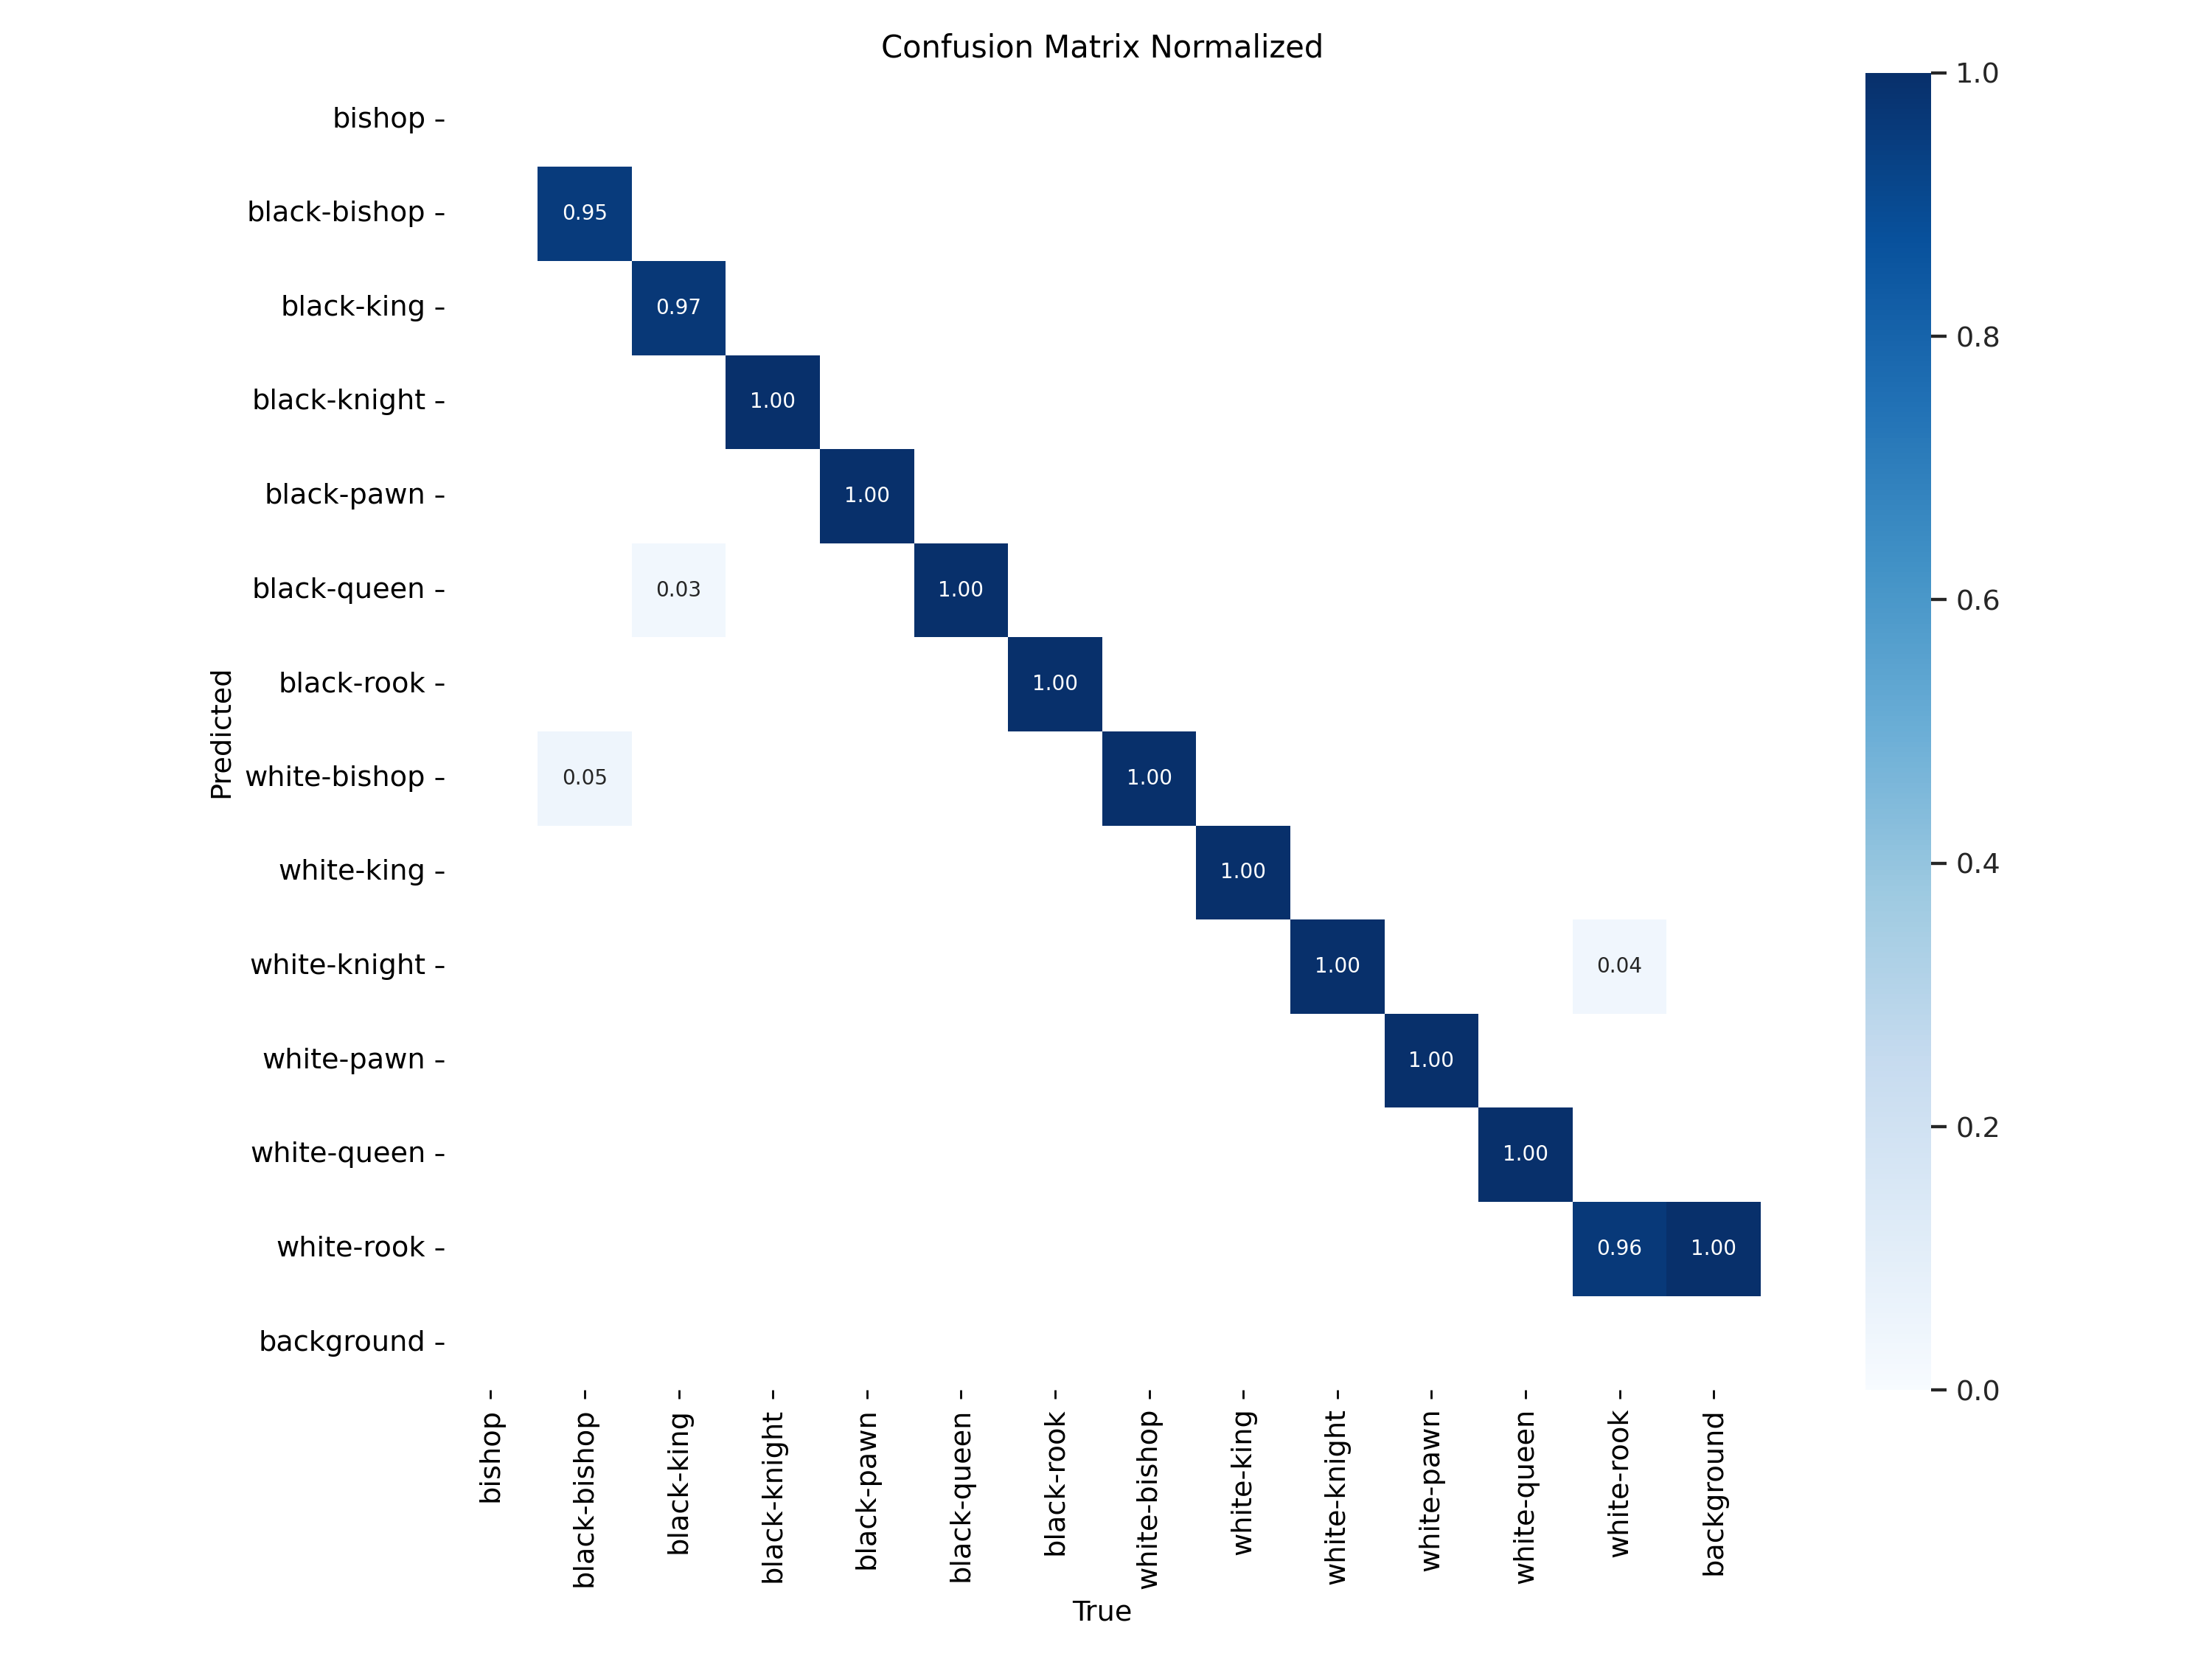

In [70]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix_normalized.png', width=800)

/content


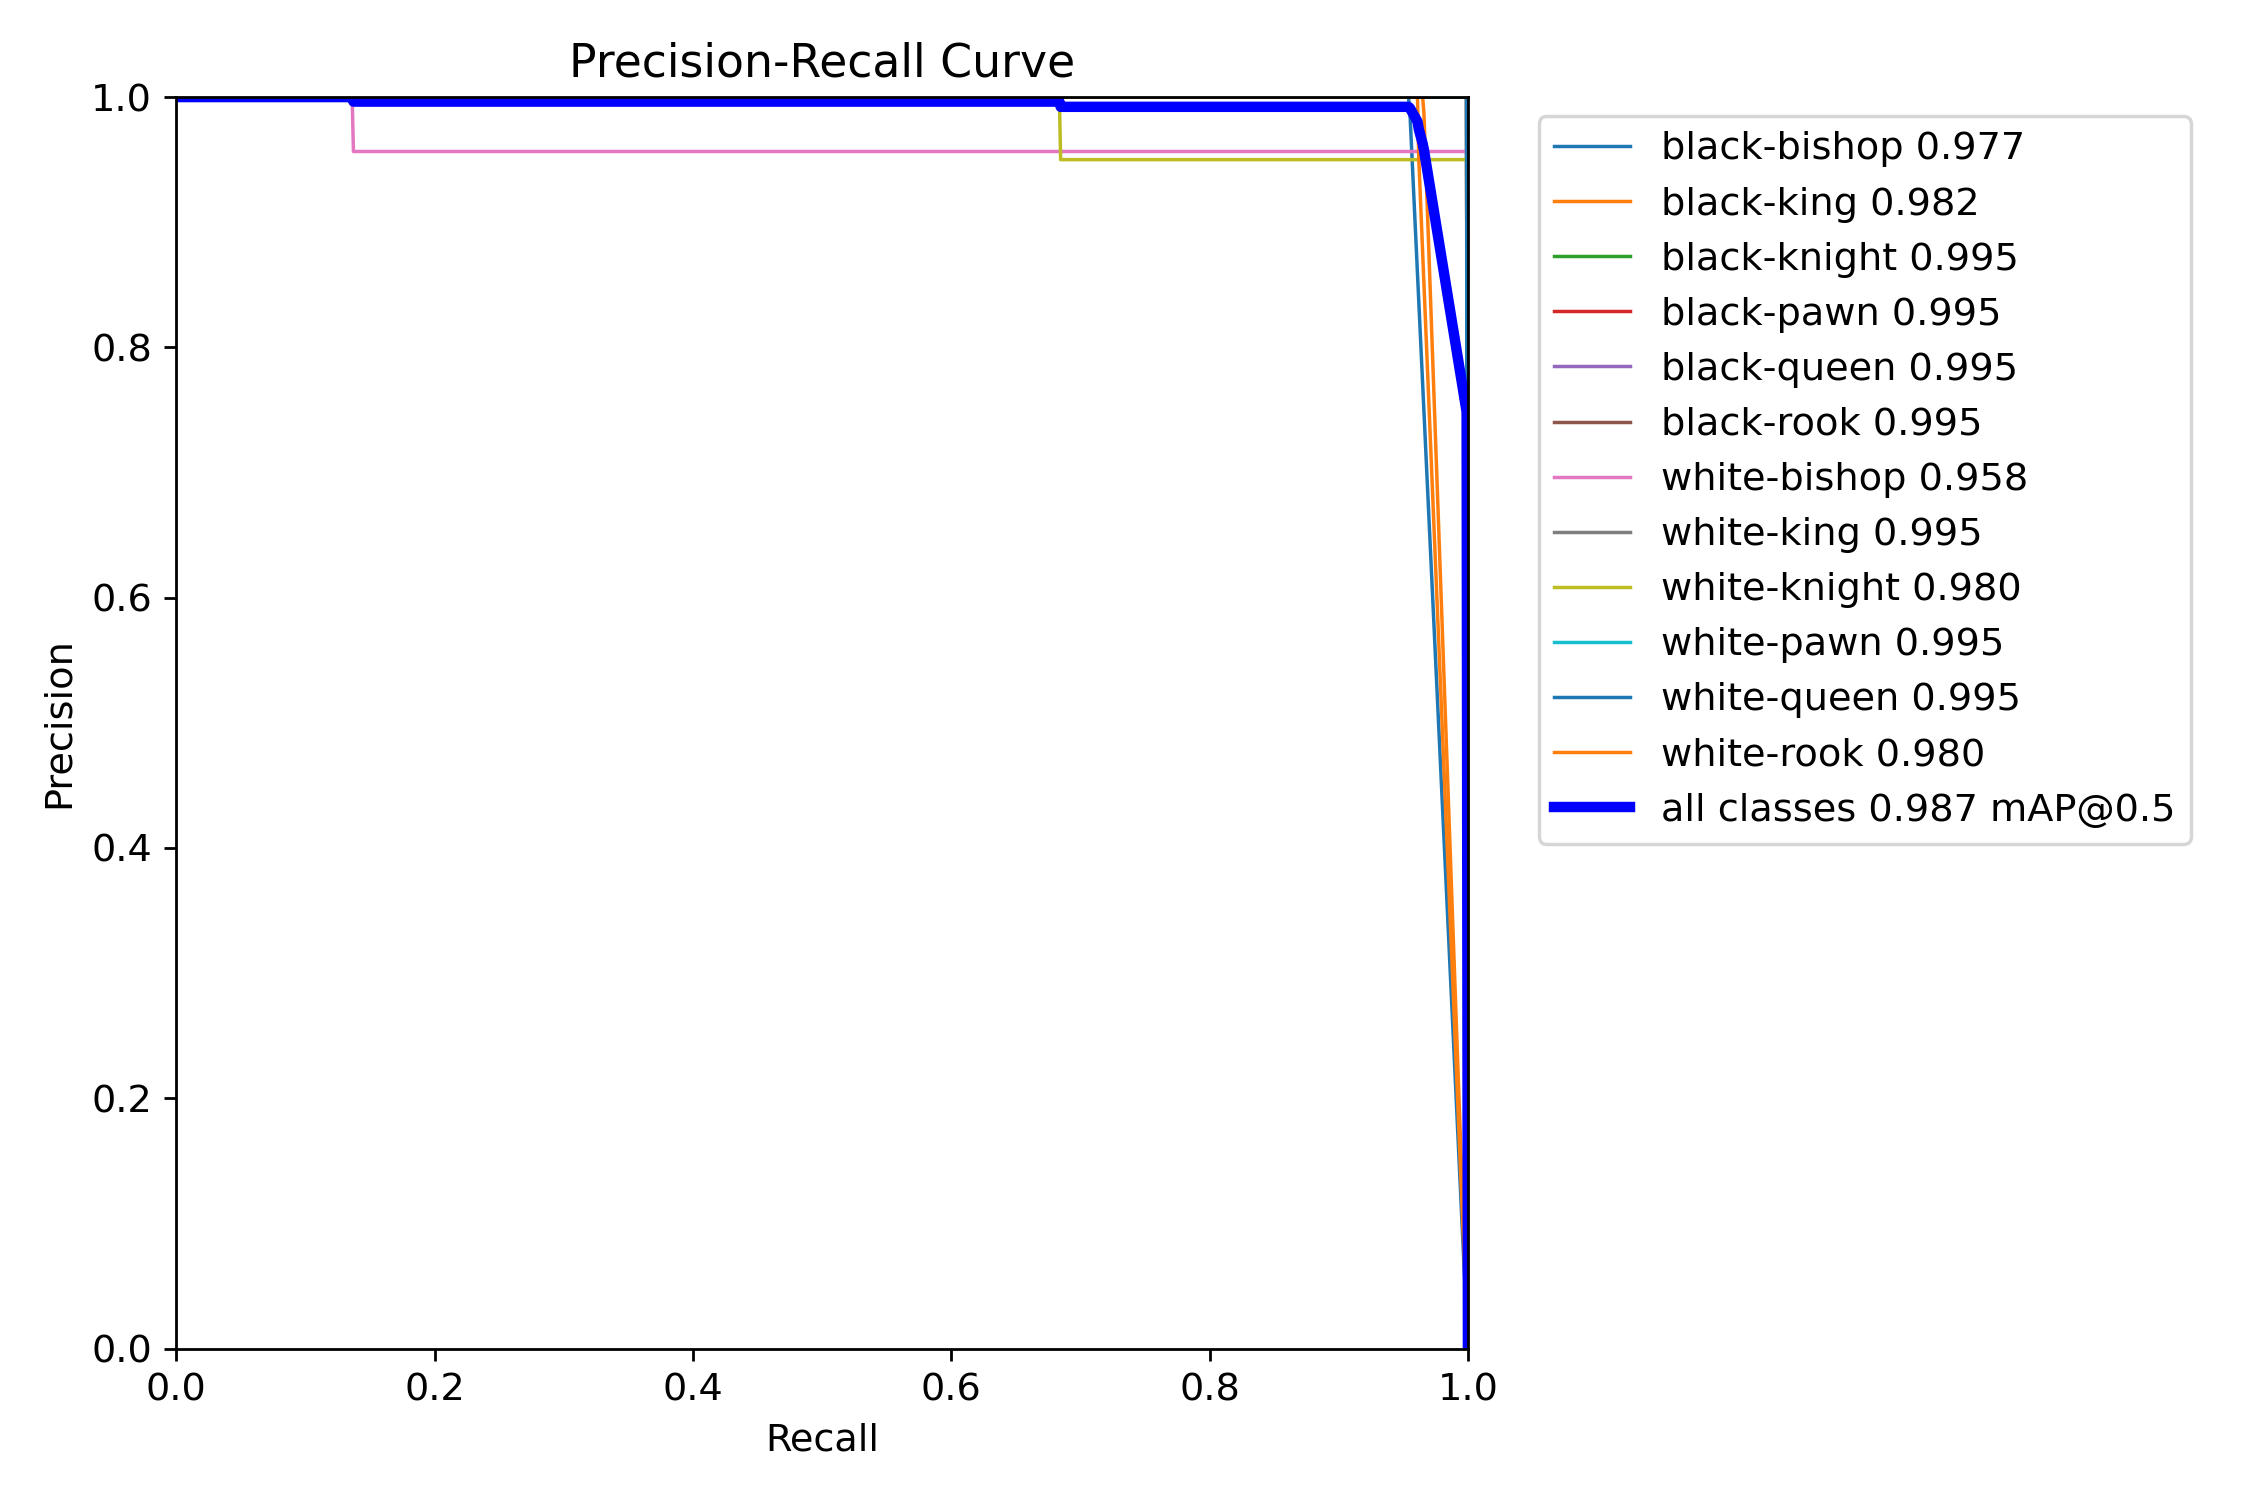

In [63]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/PR_curve.png', width=600)

/content


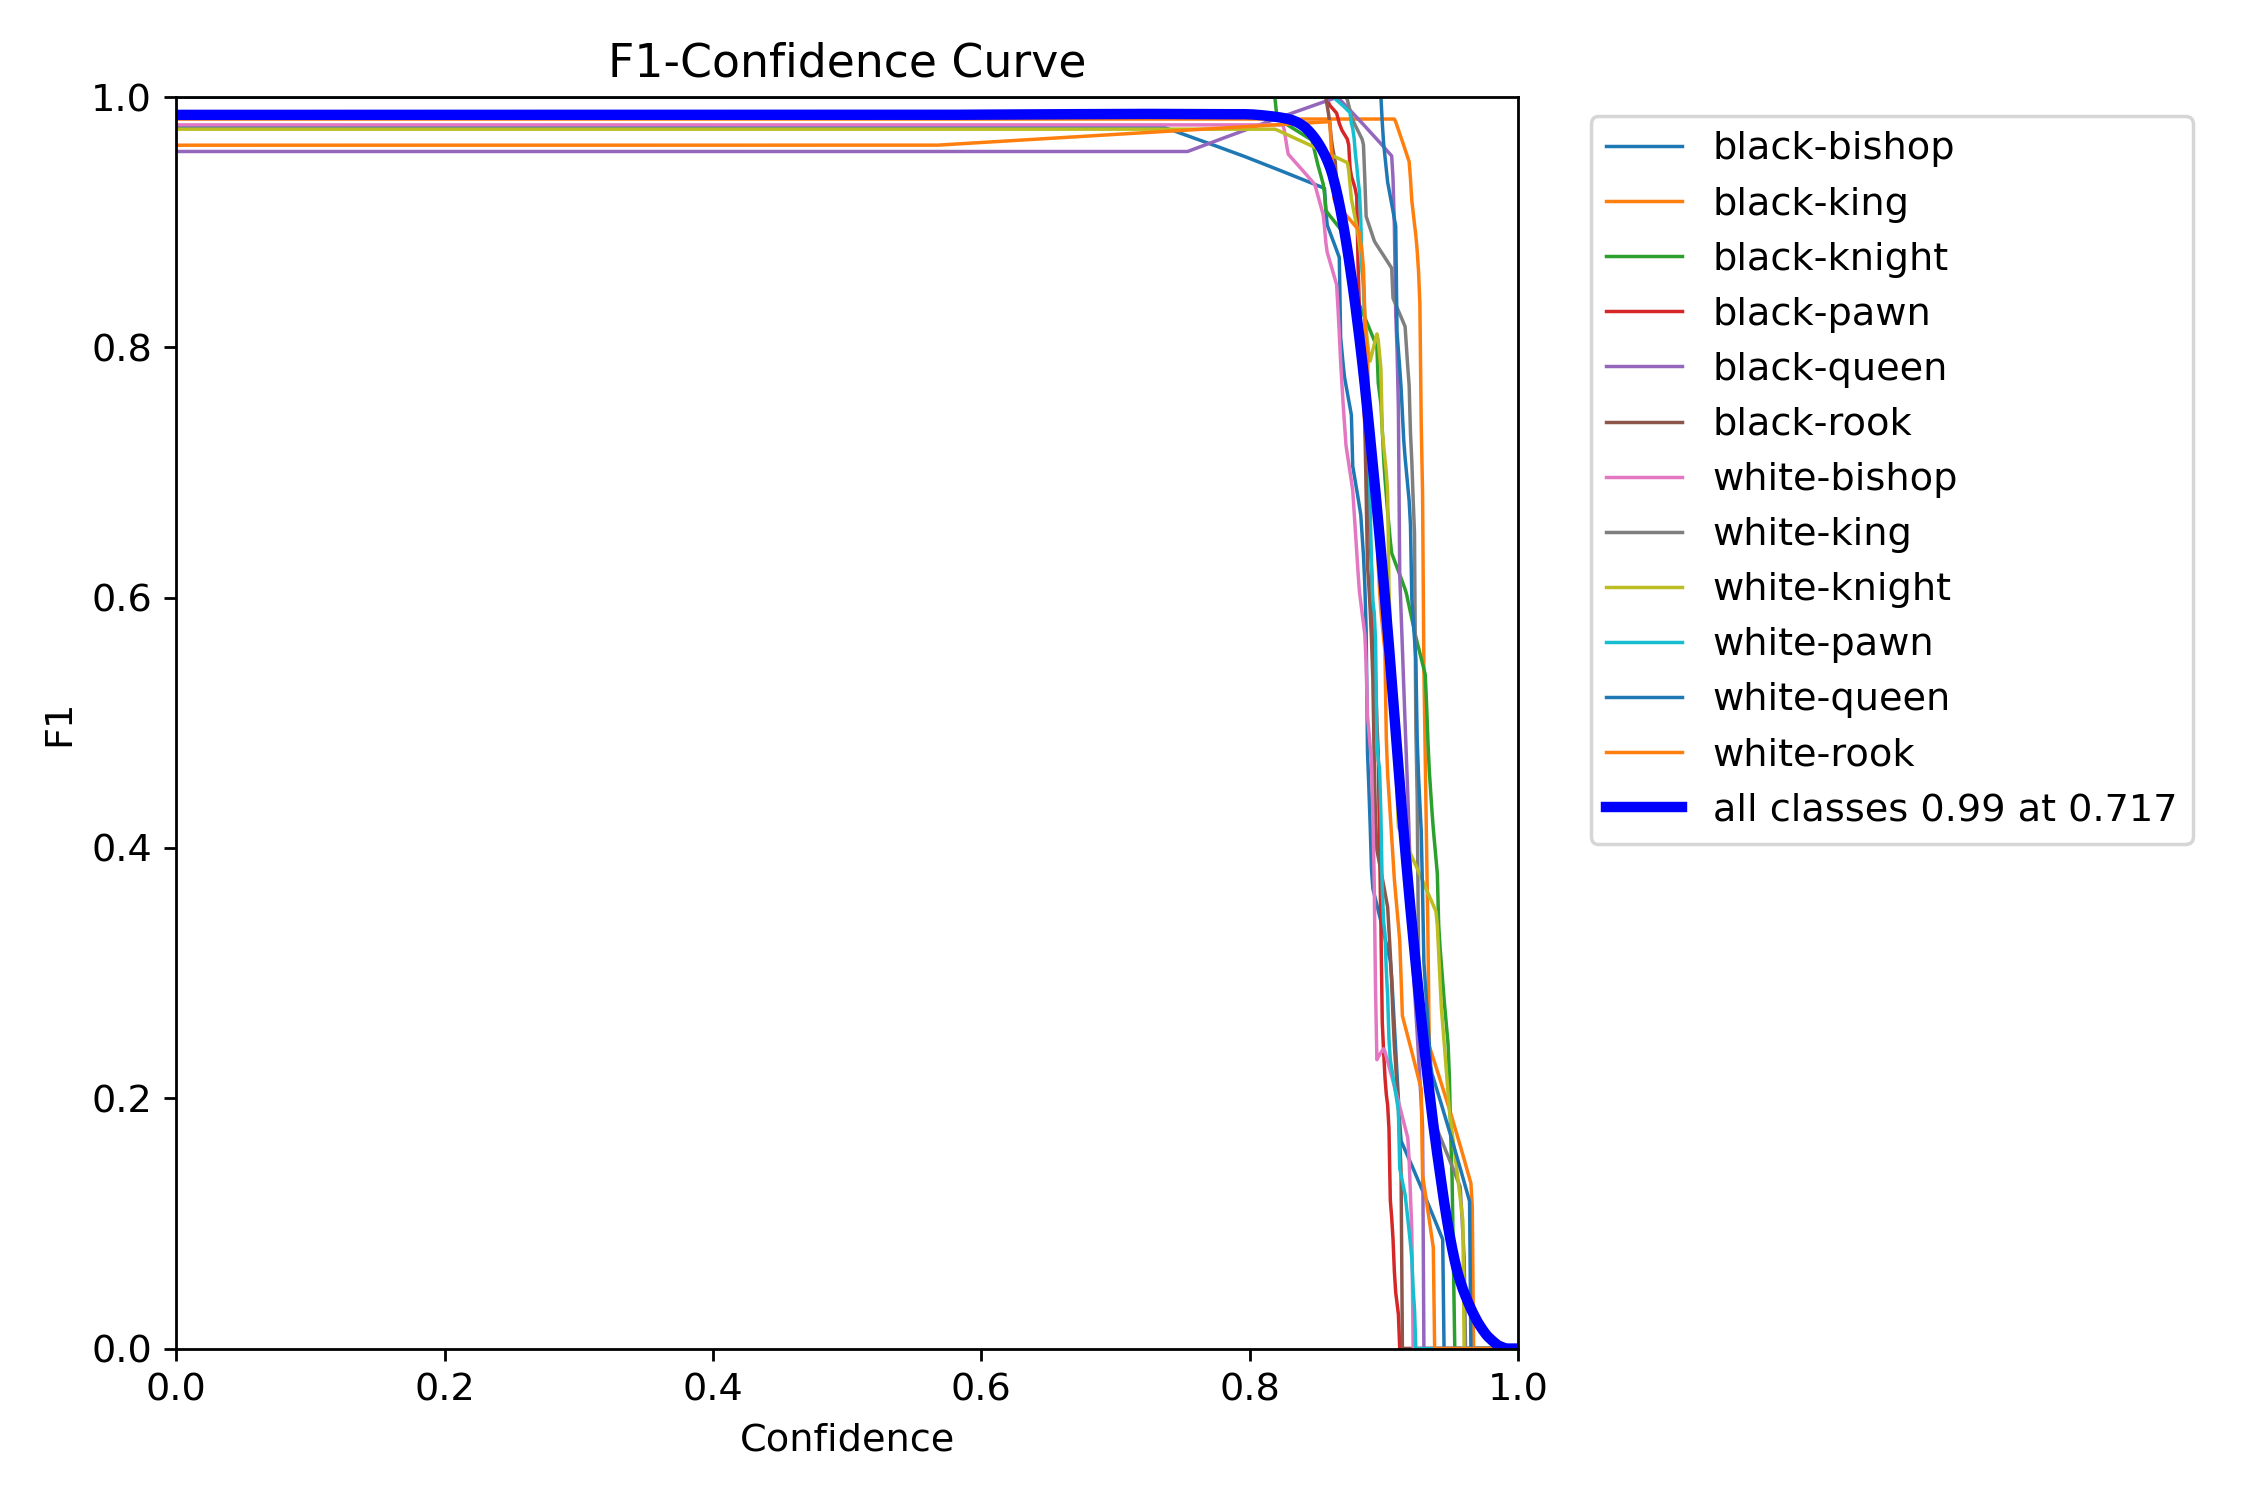

In [67]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/F1_curve.png', width=600)

/content


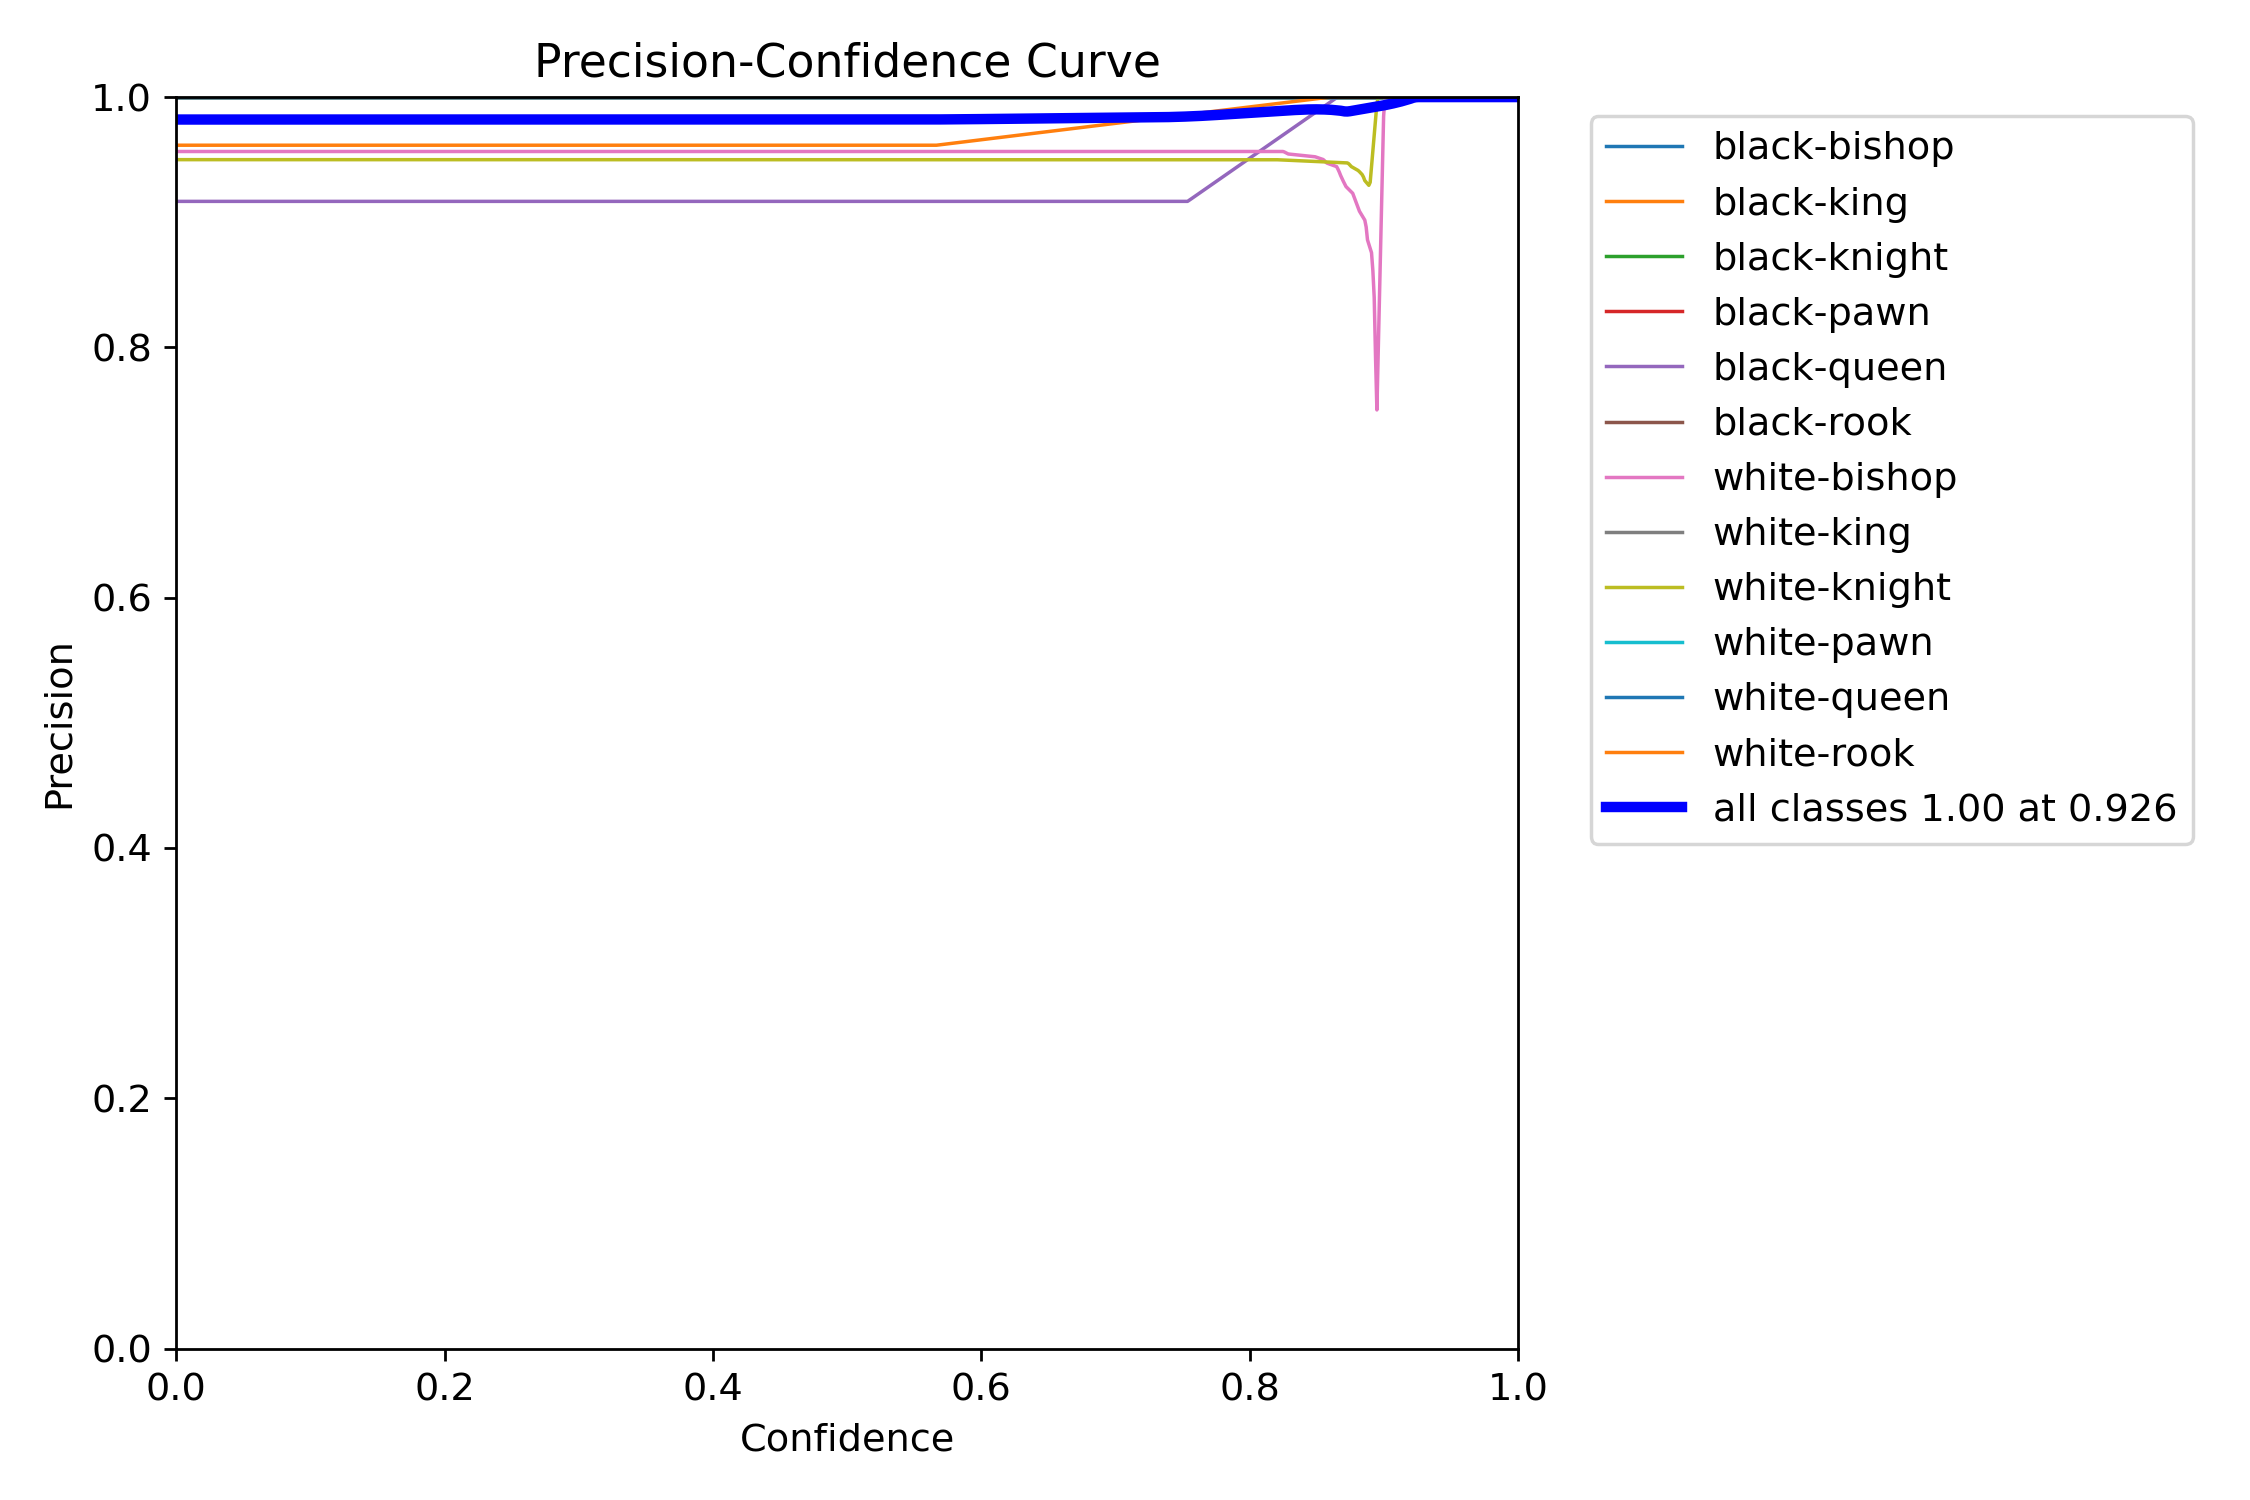

In [68]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/P_curve.png', width=600)

/content


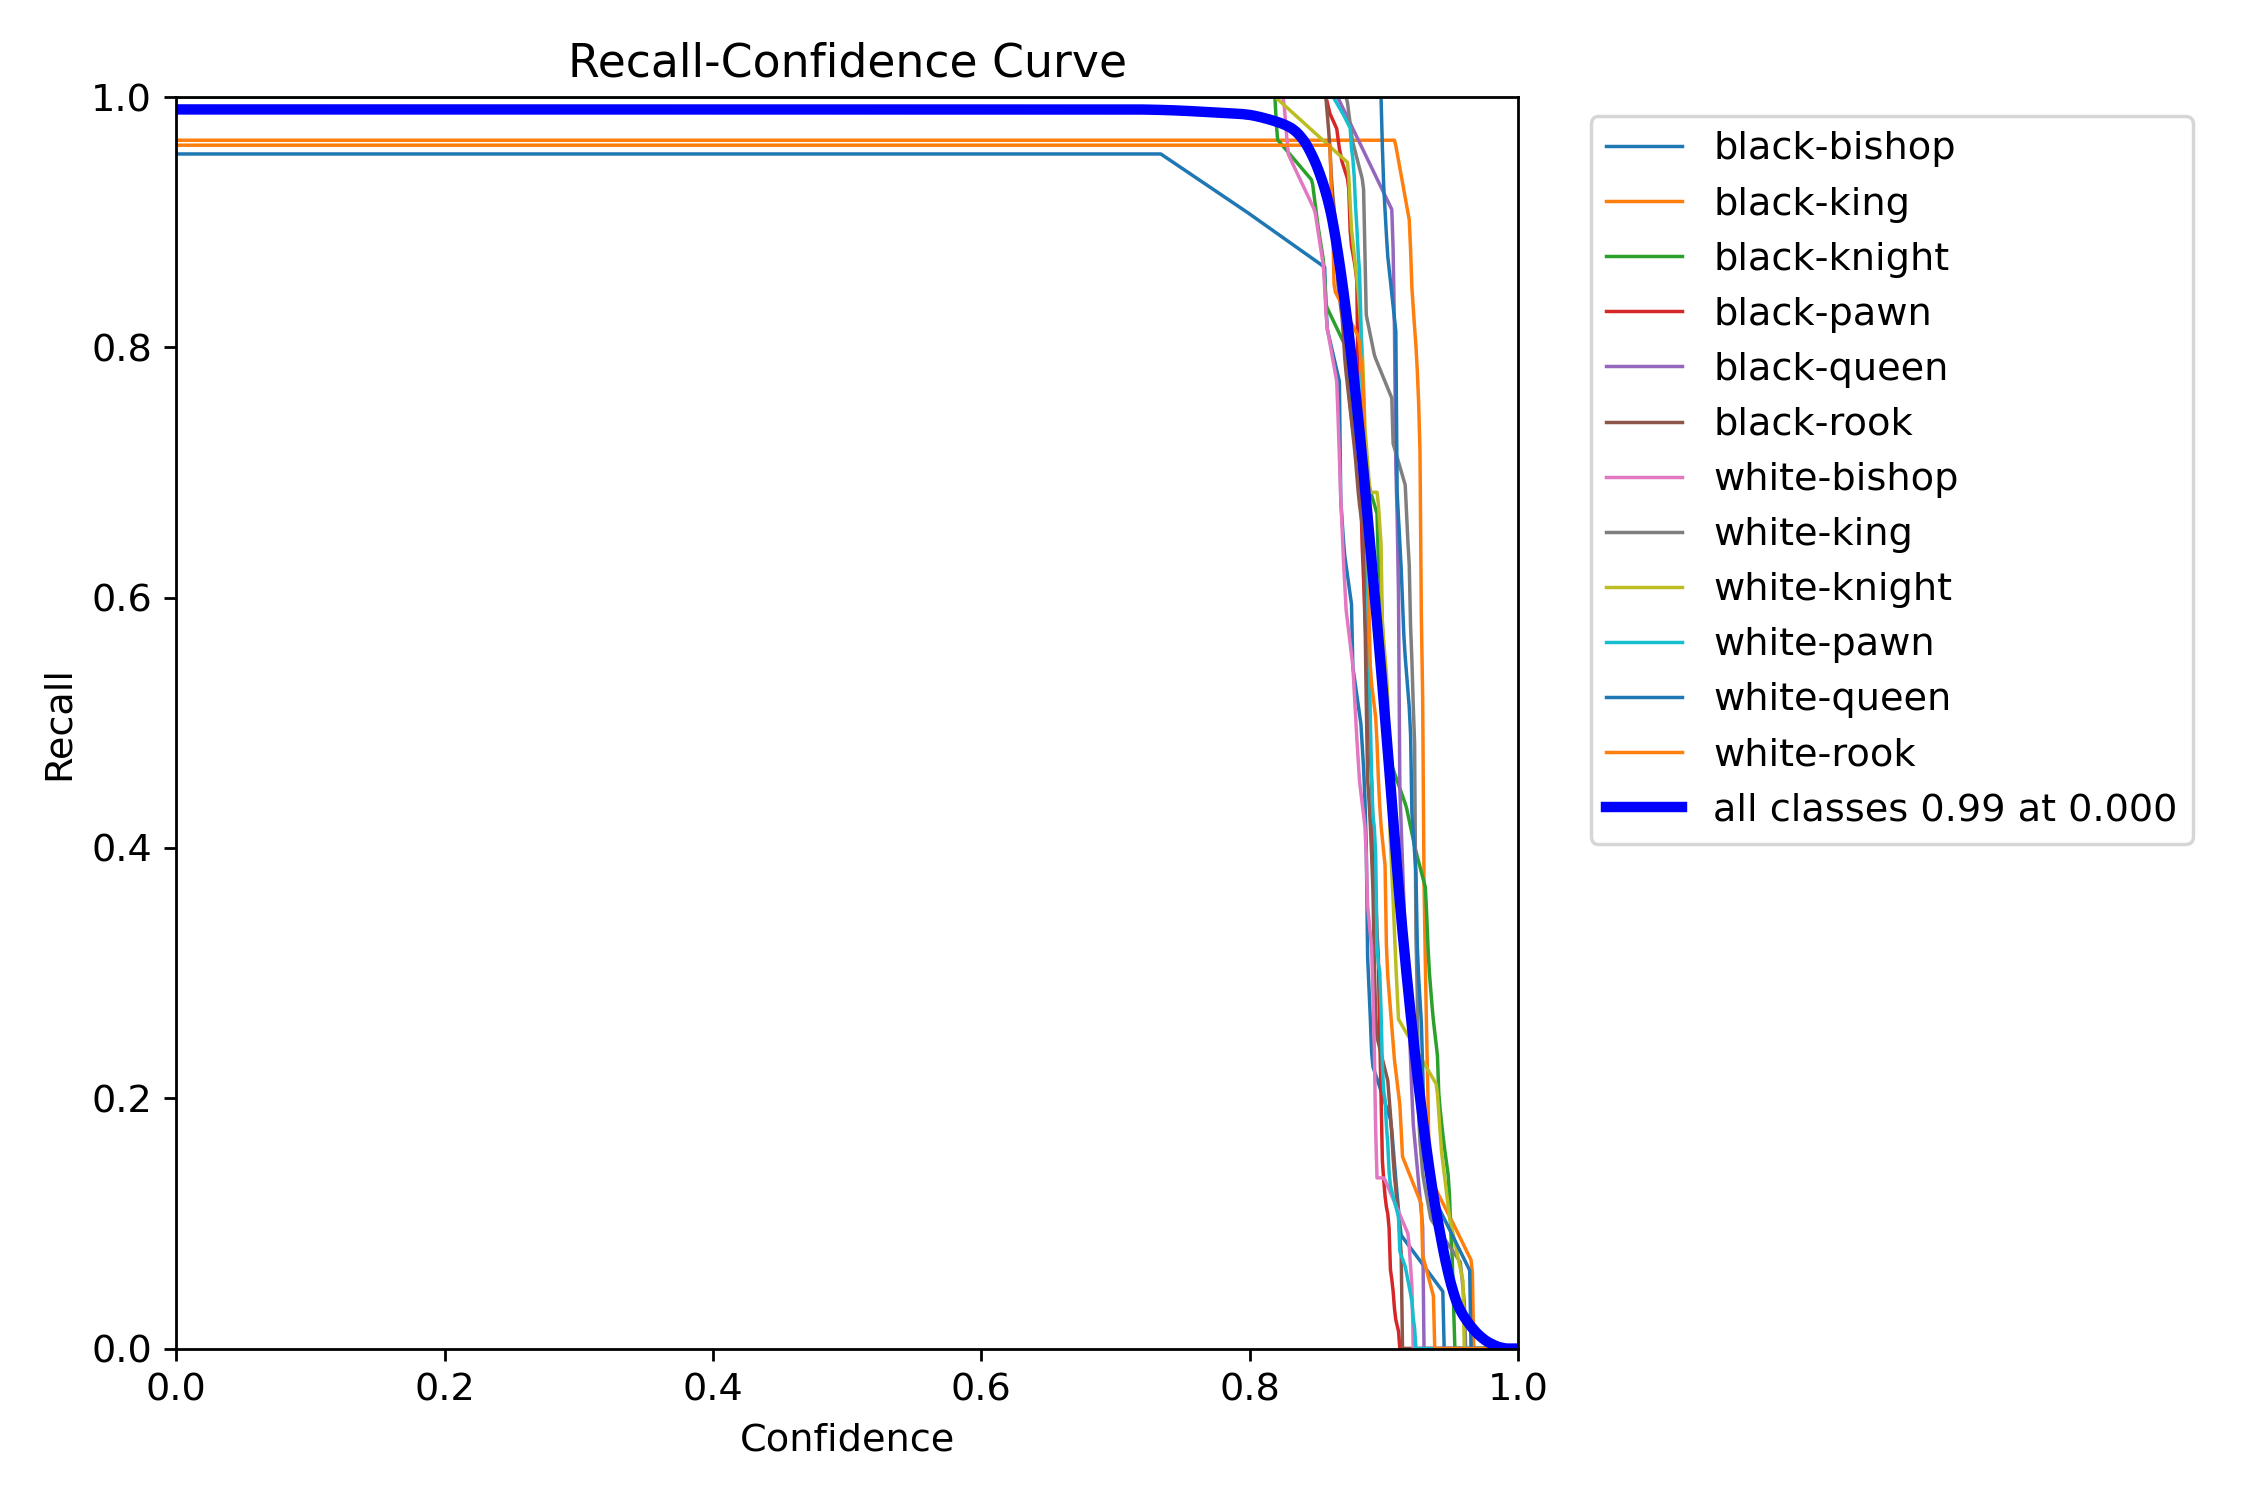

In [69]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/R_curve.png', width=600)